## Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

The company wants to know the following things about the prospective properties:

   - Which variables are significant in predicting the price of a house, and

   - How well those variables describe the price of a house.
   
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [619]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error
import statistics as S

import warnings
warnings.filterwarnings('ignore')

In [620]:
# Reading the csv file
df = pd.read_csv('train_regu.csv')

In [621]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [622]:
df.duplicated().value_counts()

False    1460
dtype: int64

There is no duplicates found in the dataset.

In [623]:
df.shape

(1460, 81)

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [625]:
# Conversion of data type
df['MSSubClass'] = df['MSSubClass'].astype('object')

In [626]:
num_var = df.dtypes[df.dtypes != 'object'].index
num_var.shape

(37,)

In [627]:
cat_var = df.select_dtypes('object').columns
cat_var.shape

(44,)

### Detecting and treating missing values

In [628]:
# Numerical missing values percent
df[num_var].isnull().sum()/len(df)*100

Id                0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
d

In [629]:
# Categorical missing values percent
df[cat_var].isnull().sum()/len(df) * 100

MSSubClass        0.000000
MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
G

In [630]:
# Dropping the columns having more than 45% of missing values.
df = df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [631]:
# Dropping the column 'ID' as it has no significance.
df = df.drop('Id',axis=1)

In [632]:
df.shape

(1460, 75)

### Imputation of missing values

In [633]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [634]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [635]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [636]:
df['LotFrontage'] = df['LotFrontage'].fillna(np.mean(df['LotFrontage']))
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [637]:
# Imputing the NA values of GarageYrBlt with the YearBuilt
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [638]:
# Converting data type to int
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int')

In [639]:
# Imputation of Categorical variables

miss_cat_var = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
                'GarageType','GarageFinish','GarageQual','GarageCond']

In [640]:
for col in miss_cat_var:
    print(df[col].value_counts())
    print('------------------------')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
------------------------
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
------------------------
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
------------------------
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
------------------------
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
------------------------
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
------------------------
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
------------------------
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
------------------------
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
--

In [641]:
for col in miss_cat_var:
    df[col] = df[col].fillna(S.mode(df[col]))

In [642]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Data Visualisation

In [643]:
num_var = df.dtypes[df.dtypes != 'object'].index


In [644]:
for i in num_var:
    print('-------------------')
    print(df[i].describe())
    print('-------------------')

-------------------
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
-------------------
-------------------
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
-------------------
-------------------
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
-------------------
-------------------
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
-------------------
-------------------


In [645]:
# Conversion of few features from numerical type to object type
df[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']]=df[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']].astype('int64')

In [646]:
num_var = df.dtypes[df.dtypes != 'object'].index

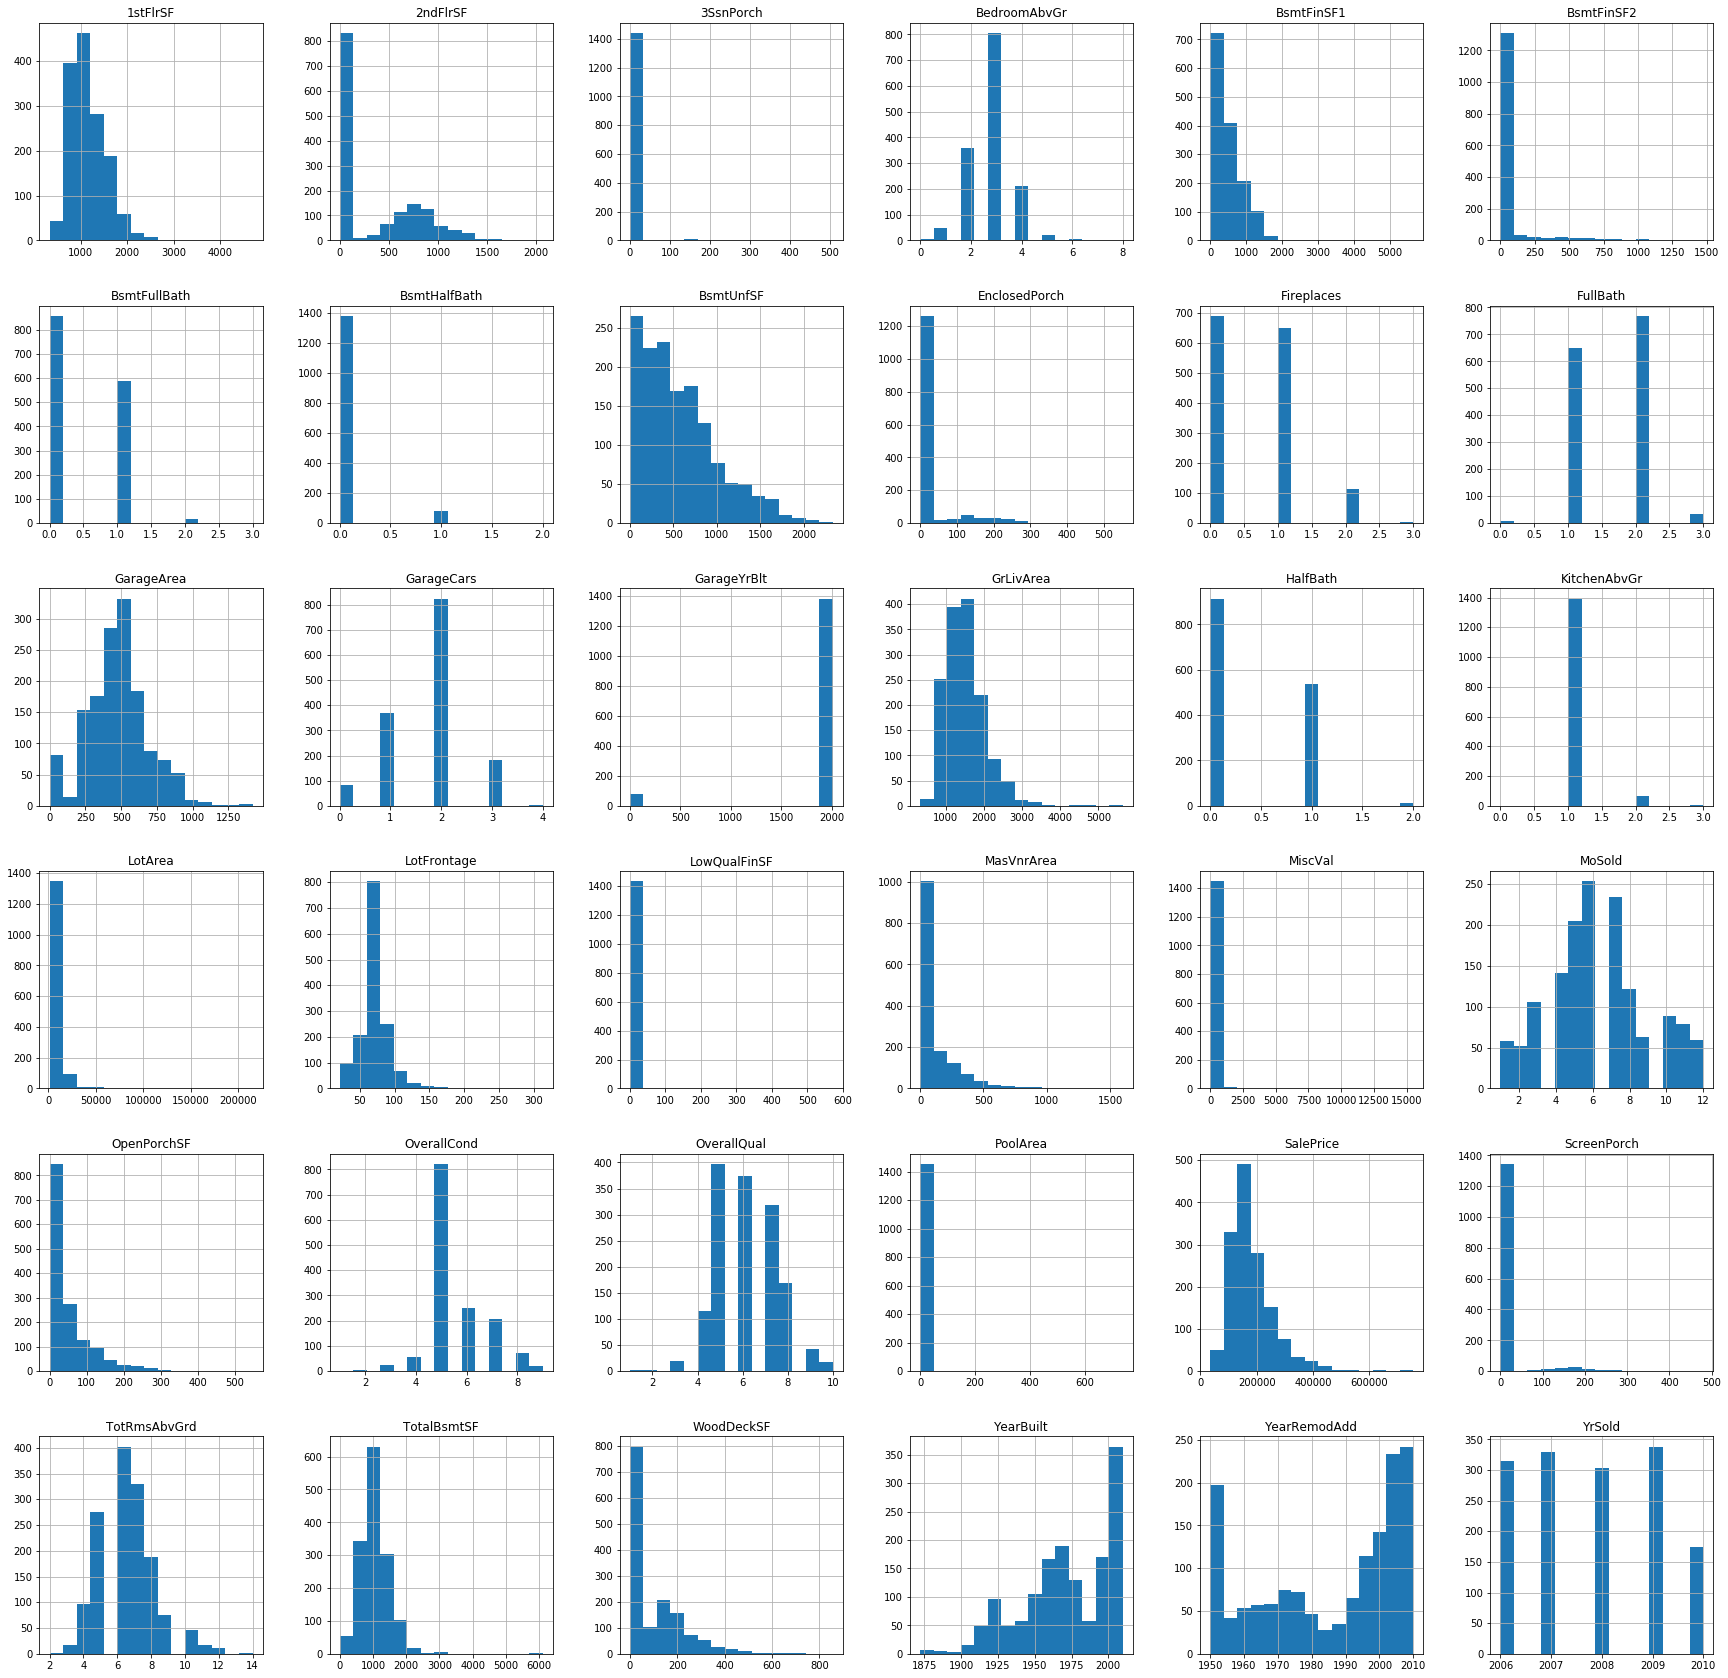

In [647]:
df[num_var].hist(bins=15, figsize=(30, 30))
plt.show()

It is inferred that few variables are highly skewed

### Correlation matrix

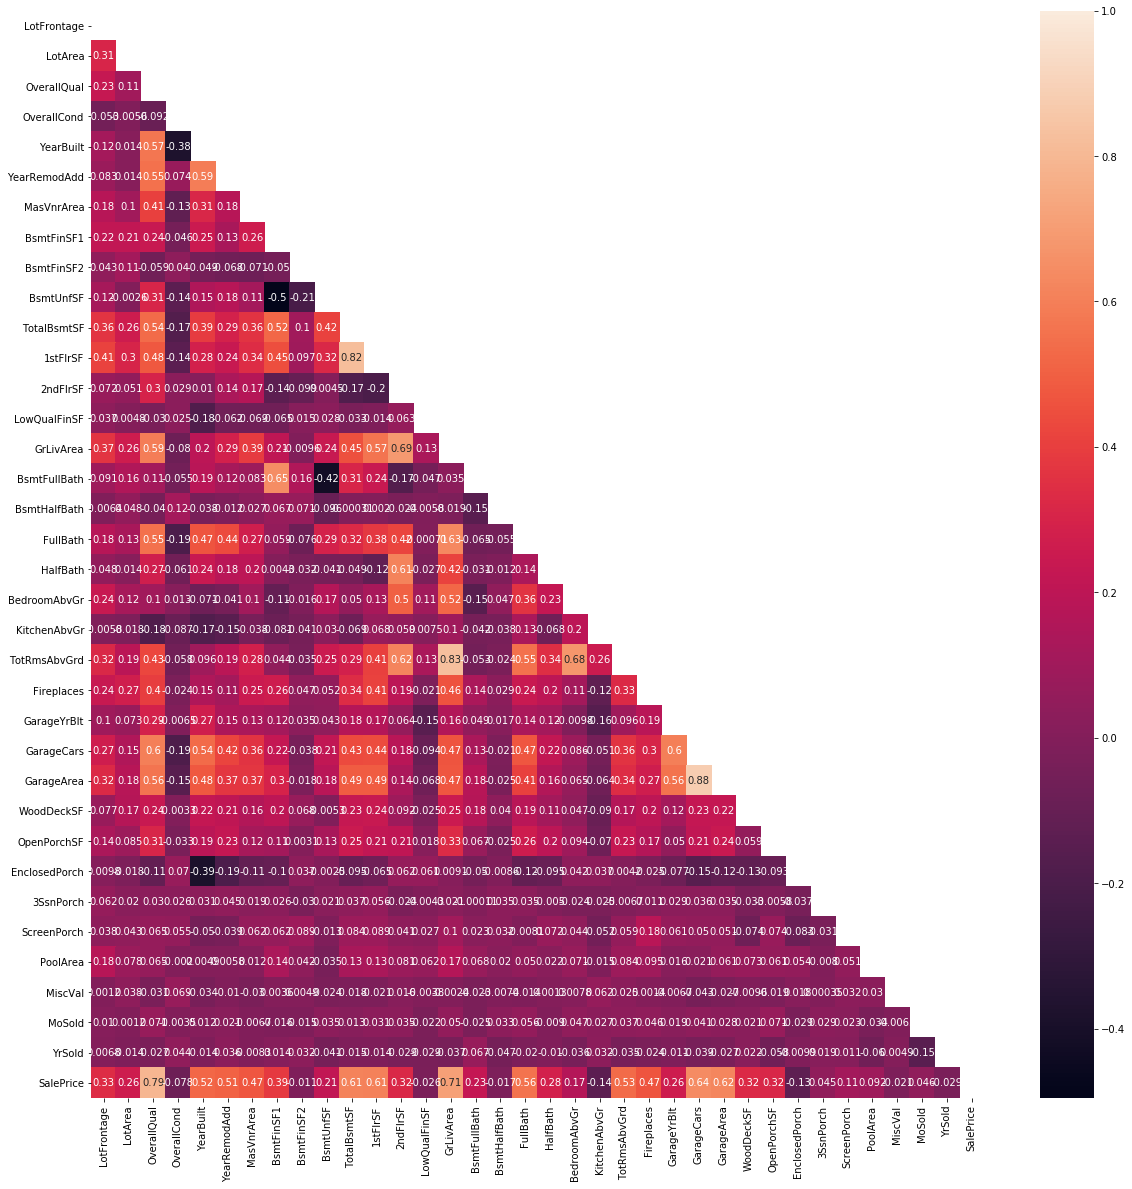

In [648]:
plt.figure(figsize=[20,20])
mask = np.zeros_like(df[num_var].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[num_var].corr(),annot=True,mask=mask)

In [649]:
corr_mat = df[num_var].corr()
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
unique_corr = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr.sort_values(ascending=False) * 100
sorted_mat.head(50)

GarageArea    GarageCars      88.247541
TotRmsAbvGrd  GrLivArea       82.548937
1stFlrSF      TotalBsmtSF     81.952998
SalePrice     OverallQual     79.098160
              GrLivArea       70.862448
GrLivArea     2ndFlrSF        68.750106
TotRmsAbvGrd  BedroomAbvGr    67.661994
BsmtFullBath  BsmtFinSF1      64.921175
SalePrice     GarageCars      64.040920
FullBath      GrLivArea       63.001165
SalePrice     GarageArea      62.343144
TotRmsAbvGrd  2ndFlrSF        61.642264
SalePrice     TotalBsmtSF     61.358055
HalfBath      2ndFlrSF        60.970730
SalePrice     1stFlrSF        60.585218
GarageCars    OverallQual     60.067072
              GarageYrBlt     59.800465
GrLivArea     OverallQual     59.300743
YearRemodAdd  YearBuilt       59.285498
YearBuilt     OverallQual     57.232277
GrLivArea     1stFlrSF        56.602397
GarageArea    OverallQual     56.202176
              GarageYrBlt     56.078287
SalePrice     FullBath        56.066376
TotRmsAbvGrd  FullBath        55.478425


Multiple multicollinearities are observed in the matrix.

In [650]:
# Plotting pair plot for top 10 highly correlated independent features(with target variable)

pair_var = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
            'FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']

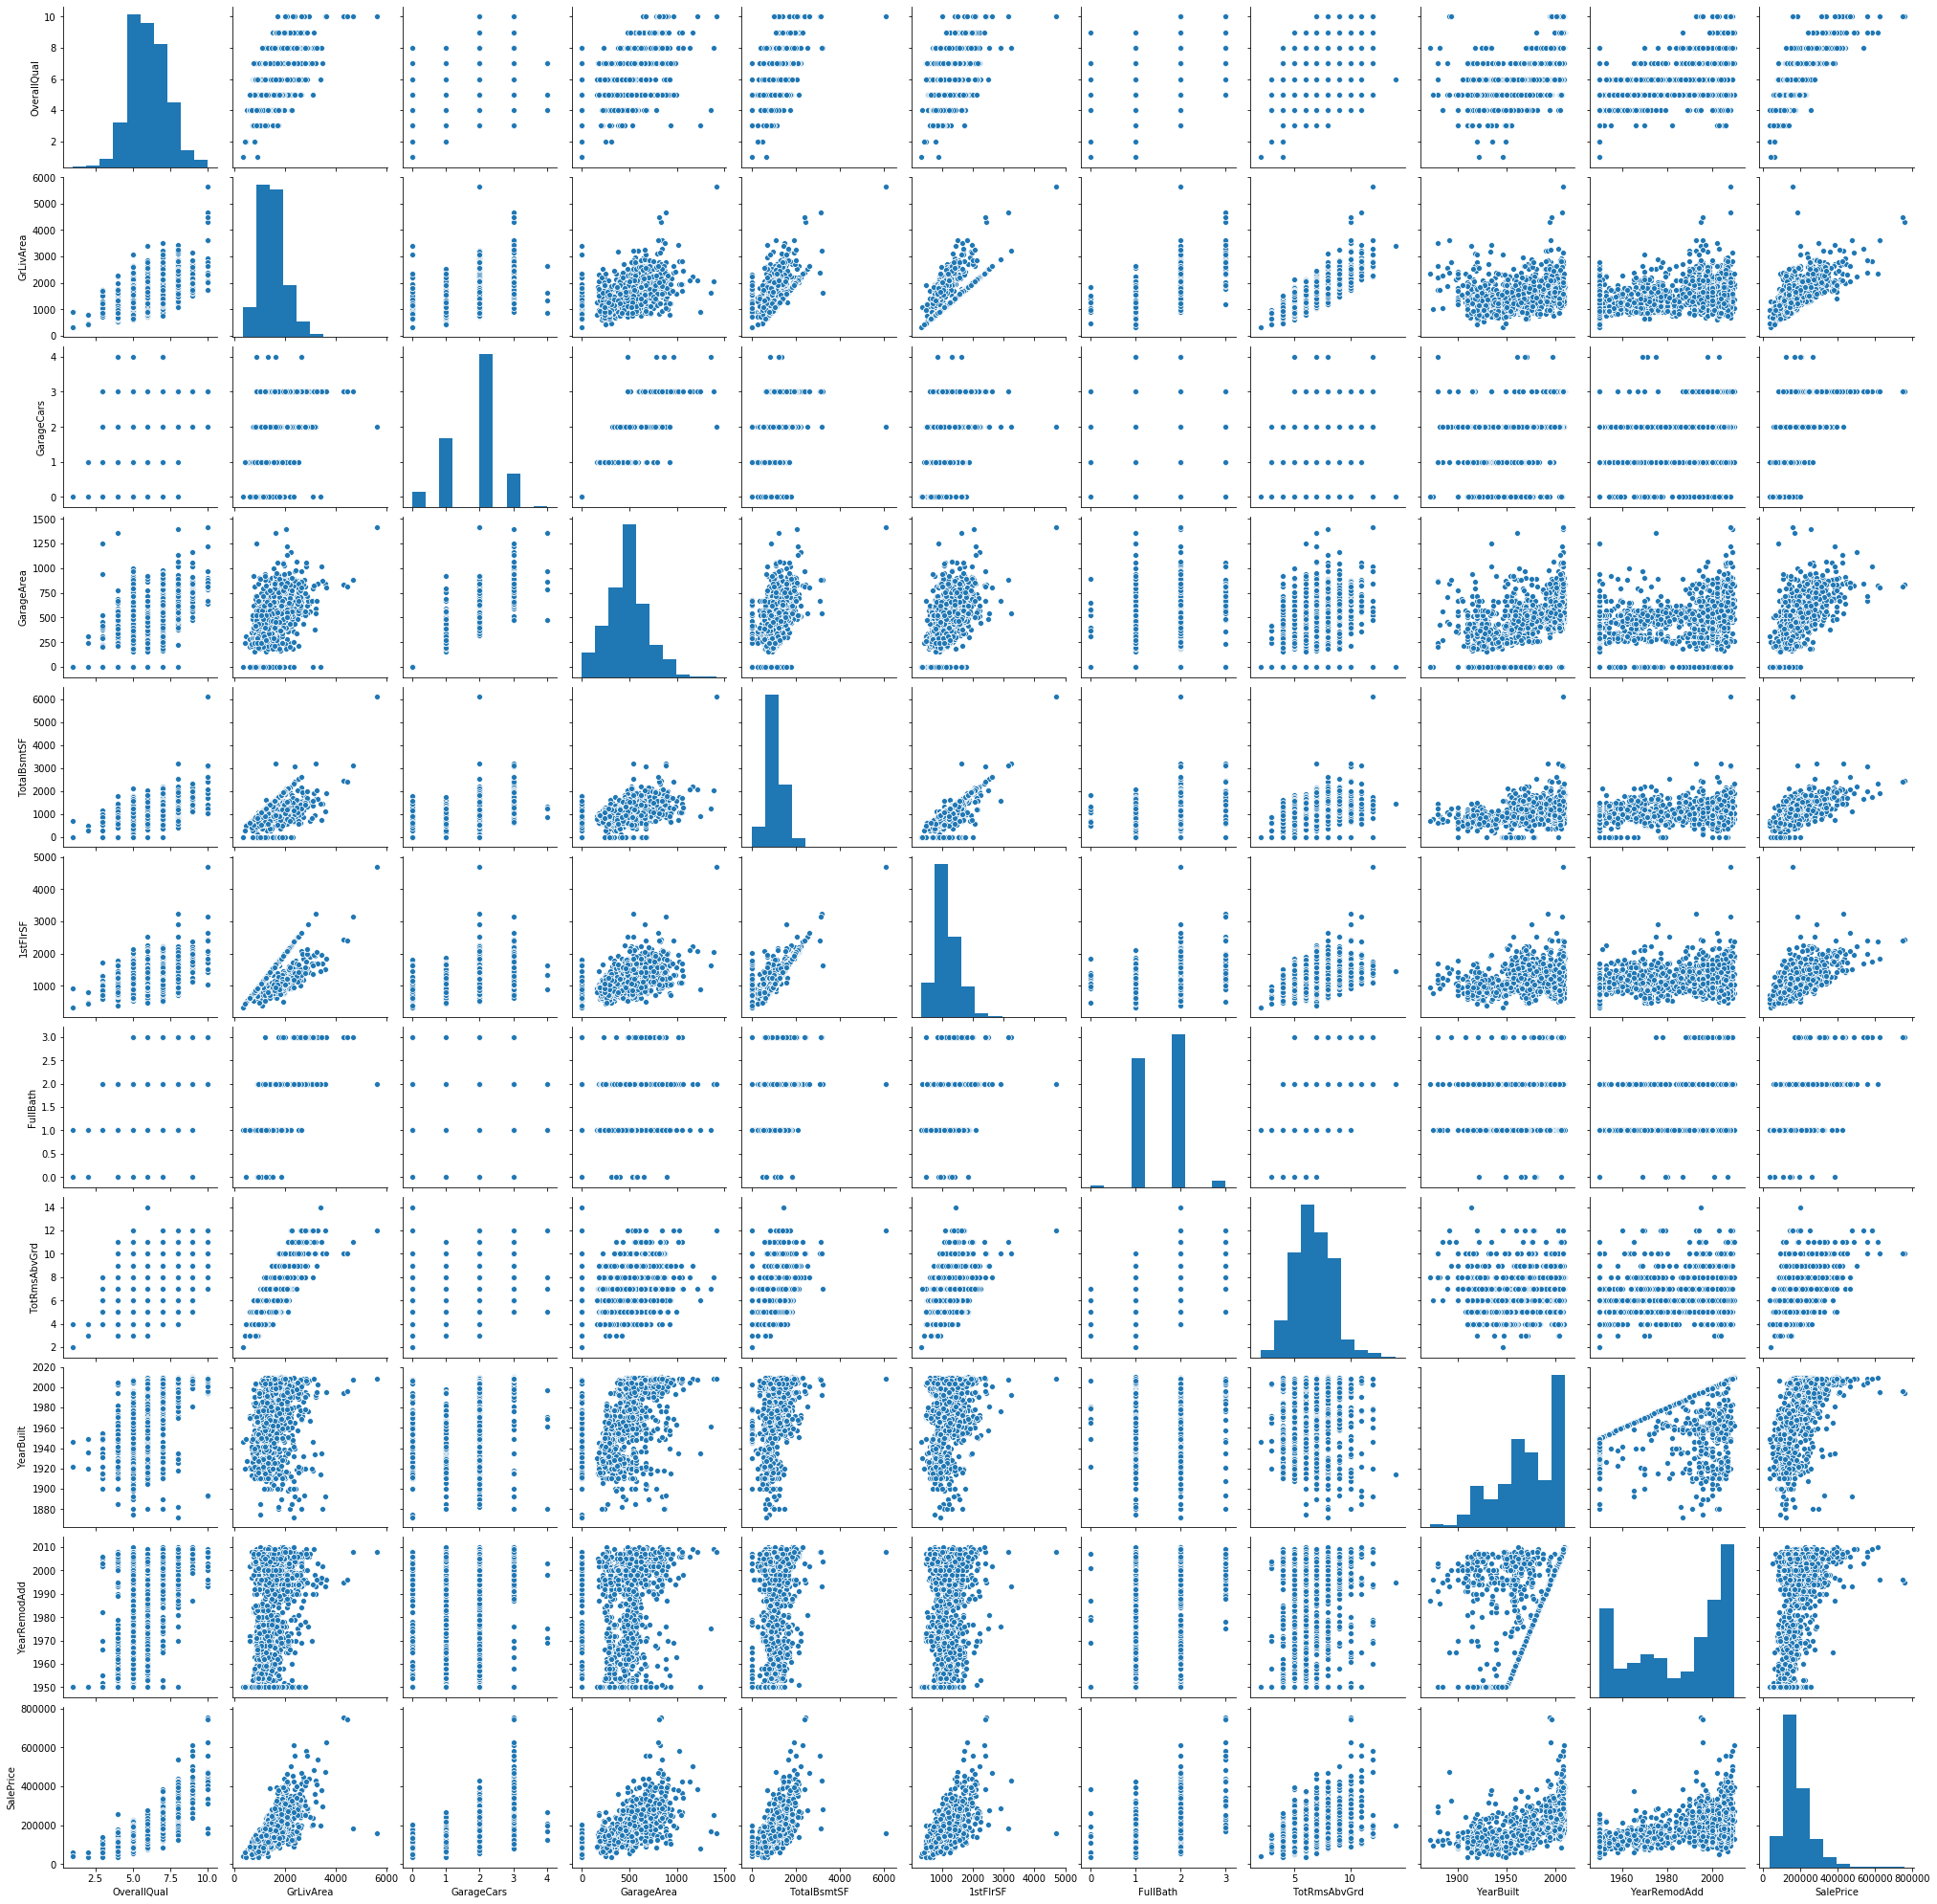

In [651]:
sns.pairplot(df[pair_var])

In [652]:
cat_var = df.select_dtypes('object').columns

In [653]:
# Categorical value analysis
for i in cat_var:
    print('----------------------------')
    print(df[i].value_counts())
    print('----------------------------')

----------------------------
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
----------------------------
----------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------
----------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
----------------------------
----------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
----------------------------
----------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
----------------------------
----------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
----------------------------
----------------------------
Inside     1052
Corner      263
CulDSac      94
FR2 

It is observed that the following columns are highly biased for more than 80% towards single option.

Street,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,RoofMatl,ExterCond,BsmtCond,
BsmtFinType2,Heating,CentralAir,Electrical,BsmtHalfBath,KitchenAbvGr,Functional,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition

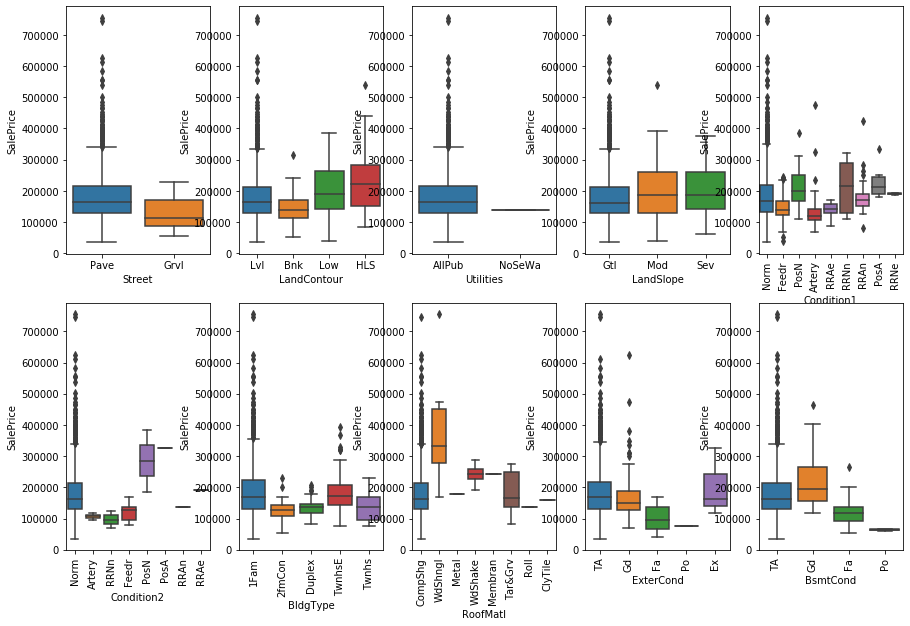

In [654]:
plt.figure(figsize=[15,10])

plt.subplot(251)
sns.boxplot(df['Street'],df['SalePrice'])

plt.subplot(252)
sns.boxplot(df['LandContour'],df['SalePrice'])
               
plt.subplot(253)
sns.boxplot(df['Utilities'],df['SalePrice'])
               
plt.subplot(254)
sns.boxplot(df['LandSlope'],df['SalePrice'])               

plt.subplot(255)
sns.boxplot(df['Condition1'],df['SalePrice'])
plt.xticks(rotation=90)

plt.subplot(256)
sns.boxplot(df['Condition2'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(257)
sns.boxplot(df['BldgType'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(258)
sns.boxplot(df['RoofMatl'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(259)
sns.boxplot(df['ExterCond'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(2,5,10)
sns.boxplot(df['BsmtCond'],df['SalePrice'])
plt.xticks(rotation=90)


plt.show()             

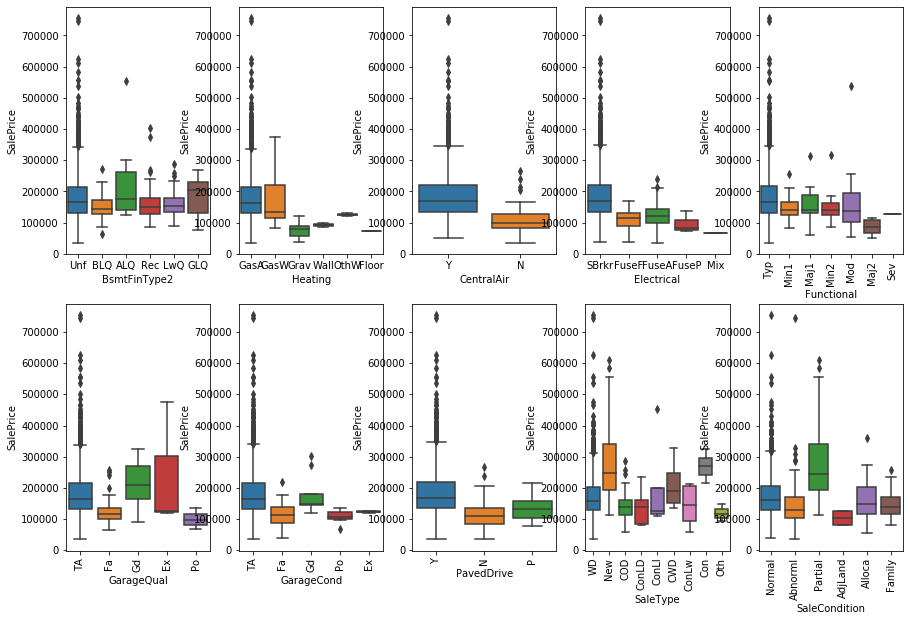

In [655]:
plt.figure(figsize=[15,10])

plt.subplot(251)
sns.boxplot(df['BsmtFinType2'],df['SalePrice'])

plt.subplot(252)
sns.boxplot(df['Heating'],df['SalePrice'])
               
plt.subplot(253)
sns.boxplot(df['CentralAir'],df['SalePrice'])
               
plt.subplot(254)
sns.boxplot(df['Electrical'],df['SalePrice'])               

plt.subplot(255)
sns.boxplot(df['Functional'],df['SalePrice'])
plt.xticks(rotation=90)

plt.subplot(256)
sns.boxplot(df['GarageQual'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(257)
sns.boxplot(df['GarageCond'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(258)
sns.boxplot(df['PavedDrive'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(259)
sns.boxplot(df['SaleType'],df['SalePrice'])
plt.xticks(rotation=90)


plt.subplot(2,5,10)
sns.boxplot(df['SaleCondition'],df['SalePrice'])
plt.xticks(rotation=90)


plt.show()             

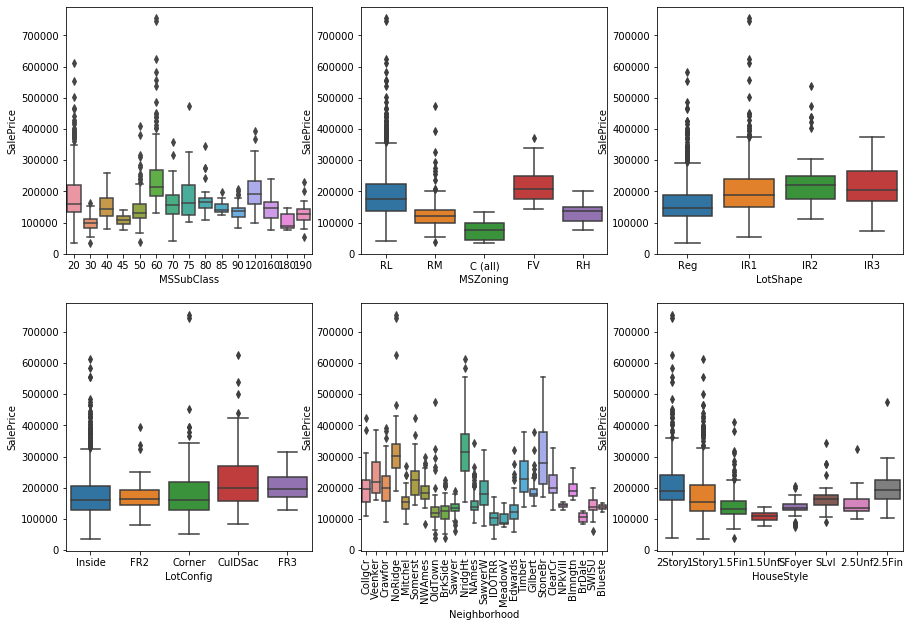

In [656]:
plt.figure(figsize=[15,10])

plt.subplot(231)
sns.boxplot(df['MSSubClass'],df['SalePrice'])

plt.subplot(232)
sns.boxplot(df['MSZoning'],df['SalePrice'])
               
plt.subplot(233)
sns.boxplot(df['LotShape'],df['SalePrice'])
               
plt.subplot(234)
sns.boxplot(df['LotConfig'],df['SalePrice'])               

plt.subplot(235)
sns.boxplot(df['Neighborhood'],df['SalePrice'])
plt.xticks(rotation=90)
plt.subplot(236)
sns.boxplot(df['HouseStyle'],df['SalePrice'])

plt.show()             

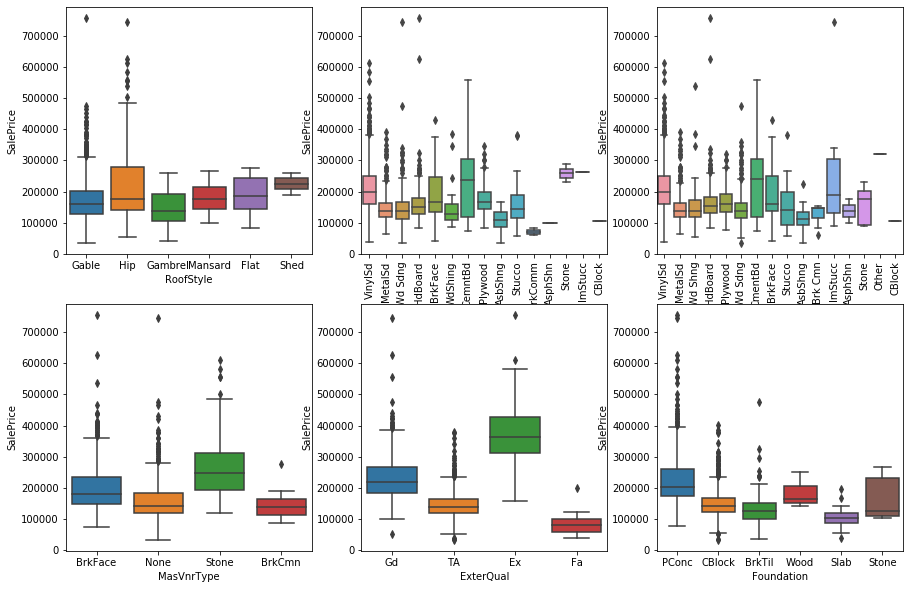

In [39]:
plt.figure(figsize=[15,10])

plt.subplot(231)
sns.boxplot(df['RoofStyle'],df['SalePrice'])

plt.subplot(232)
sns.boxplot(df['Exterior1st'],df['SalePrice'])
plt.xticks(rotation=90)
               
plt.subplot(233)
sns.boxplot(df['Exterior2nd'],df['SalePrice'])
plt.xticks(rotation=90)
               
plt.subplot(234)
sns.boxplot(df['MasVnrType'],df['SalePrice'])               

plt.subplot(235)
sns.boxplot(df['ExterQual'],df['SalePrice'])

plt.subplot(236)
sns.boxplot(df['Foundation'],df['SalePrice'])

plt.show()    


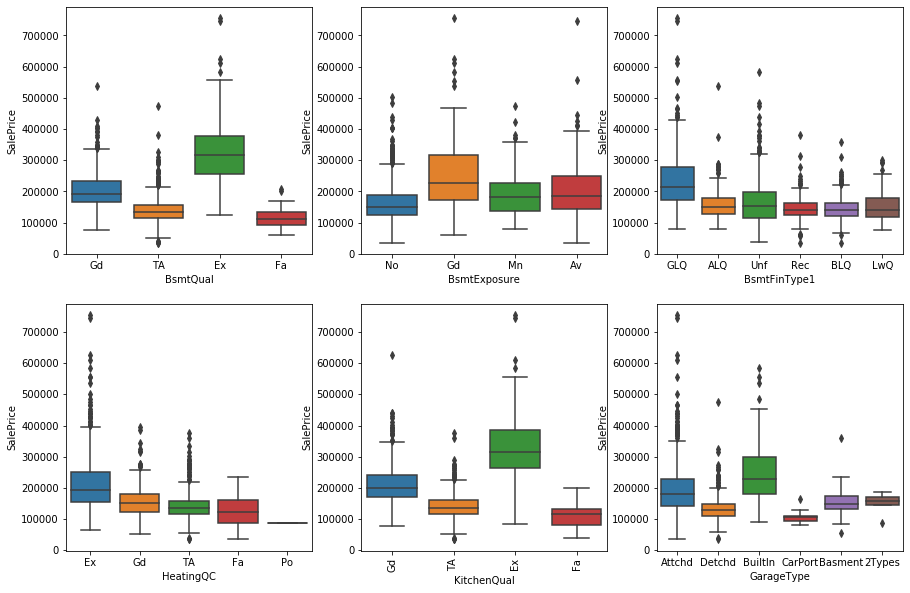

In [40]:
plt.figure(figsize=[15,10])

plt.subplot(231)
sns.boxplot(df['BsmtQual'],df['SalePrice'])

plt.subplot(232)
sns.boxplot(df['BsmtExposure'],df['SalePrice'])
               
plt.subplot(233)
sns.boxplot(df['BsmtFinType1'],df['SalePrice'])
               
plt.subplot(234)
sns.boxplot(df['HeatingQC'],df['SalePrice'])               

plt.subplot(235)
sns.boxplot(df['KitchenQual'],df['SalePrice'])
plt.xticks(rotation=90)

plt.subplot(236)
sns.boxplot(df['GarageType'],df['SalePrice'])

plt.show()             

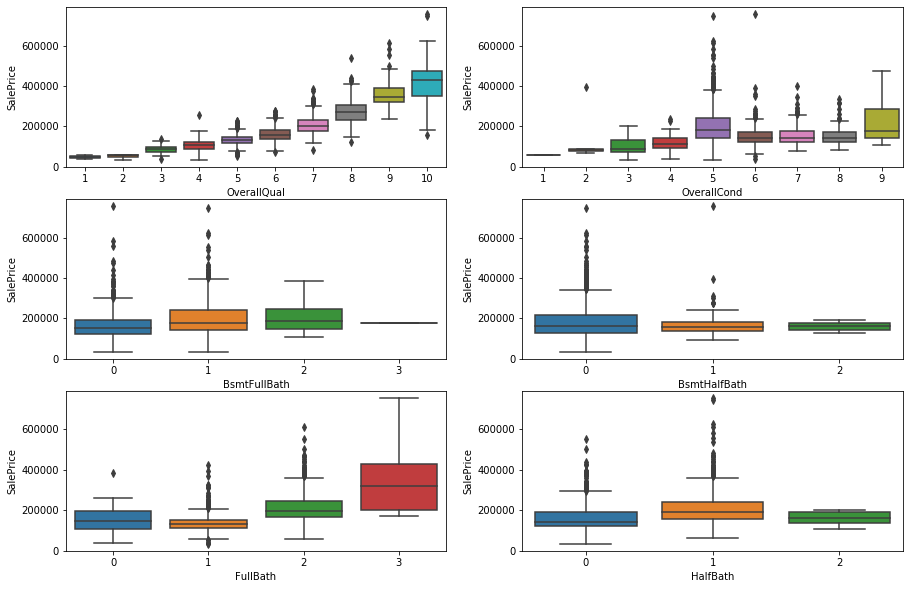

In [41]:
plt.figure(figsize=[15,10])

plt.subplot(3,2,1)
sns.boxplot(df['OverallQual'],df['SalePrice'])

plt.subplot(3,2,2)
sns.boxplot(df['OverallCond'],df['SalePrice'])

plt.subplot(3,2,3)
sns.boxplot(df['BsmtFullBath'],df['SalePrice'])

plt.subplot(3,2,4)
sns.boxplot(df['BsmtHalfBath'],df['SalePrice'])

plt.subplot(3,2,5)
sns.boxplot(df['FullBath'],df['SalePrice'])

plt.subplot(3,2,6)
sns.boxplot(df['HalfBath'],df['SalePrice'])

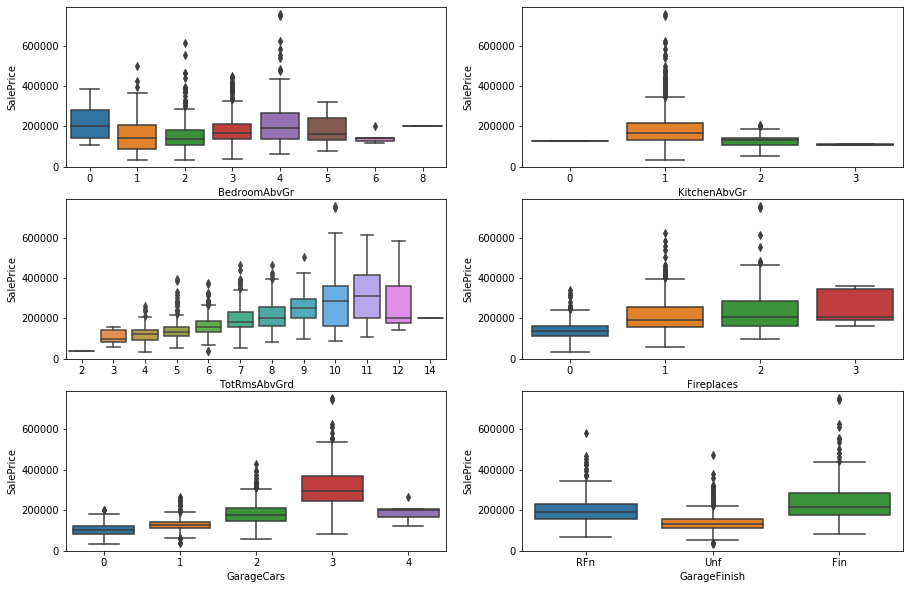

In [42]:
plt.figure(figsize=[15,10])

plt.subplot(3,2,1)
sns.boxplot(df['BedroomAbvGr'],df['SalePrice'])

plt.subplot(3,2,2)
sns.boxplot(df['KitchenAbvGr'],df['SalePrice'])

plt.subplot(3,2,3)
sns.boxplot(df['TotRmsAbvGrd'],df['SalePrice'])

plt.subplot(3,2,4)
sns.boxplot(df['Fireplaces'],df['SalePrice'])

plt.subplot(3,2,5)
sns.boxplot(df['GarageCars'],df['SalePrice'])

plt.subplot(3,2,6)
sns.boxplot(df['GarageFinish'],df['SalePrice'])

In [657]:
# Map Functions
def Map1(x):
    return x.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
def Map2(x):
    return x.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
def Map3(x):
    return x.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
def Map4(x):
    return x.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
def Map5(x):
    return x.map({'Y':1,'N':0})

In [658]:
df['ExterQual'] = df[['ExterQual']].apply(Map1)
df['BsmtQual'] = df[['BsmtQual']].apply(Map1)
df['HeatingQC'] = df[['HeatingQC']].apply(Map1)
df['KitchenQual'] = df[['KitchenQual']].apply(Map1)
df['ExterCond'] = df[['ExterCond']].apply(Map1)
df['BsmtCond'] = df[['BsmtCond']].apply(Map1)
df['GarageQual'] = df[['GarageQual']].apply(Map1)
df['GarageCond'] = df[['GarageCond']].apply(Map1)

In [659]:
df['BsmtExposure'] = df[['BsmtExposure']].apply(Map2)

In [660]:
df['BsmtFinType1'] = df[['BsmtFinType1']].apply(Map3)
df['BsmtFinType2'] = df[['BsmtFinType2']].apply(Map3)

In [661]:
df['GarageFinish'] = df[['GarageFinish']].apply(Map4)

In [662]:
df['CentralAir'] = df[['CentralAir']].apply(Map5)

In [663]:
# Dummy variables creation

cat_dummy = pd.get_dummies(df[['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
                               'LandSlope','Neighborhood','Condition1','Condition2', 'BldgType',
                               'HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd',
                               'MasVnrType','Foundation','Heating','Electrical','Functional','GarageType',
                               'PavedDrive', 'SaleType', 'SaleCondition']],drop_first=True)

In [664]:
df = pd.concat([df,cat_dummy],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [665]:
df = df.drop(['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
              'LandSlope','Neighborhood','Condition1','Condition2', 'BldgType','HouseStyle',
              'RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation',
              'Heating','Electrical','Functional','GarageType','PavedDrive', 'SaleType', 'SaleCondition'],axis=1)

In [666]:
df.shape

(1460, 215)

### Distribution of Target variable

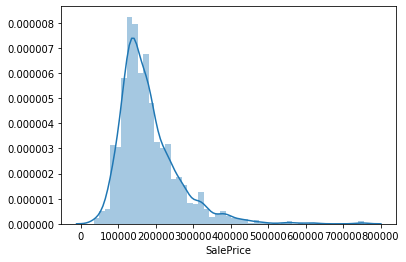

In [667]:
sns.distplot(df['SalePrice'],kde=True)

SalePrice is not normally distributed.

In [668]:
# Converting the distribution of target variable to normal distribution by using lograthmic function.

df['SalePrice'] = np.log(df['SalePrice'])

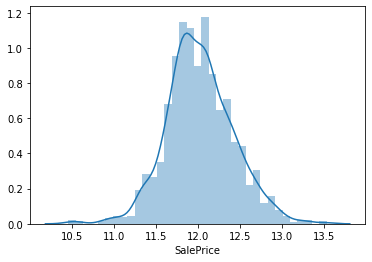

In [669]:
sns.distplot(df['SalePrice'],kde=True)

### Outlier Treatment

In [670]:
Q1 = df[num_var].quantile(0.05)
Q3 = df[num_var].quantile(0.99)
IQR = Q3 - Q1

df = df[~((df[num_var] < (Q1 - 1.5 * IQR)) |(df[num_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [671]:
df.shape

(1440, 215)

### Train Test Split

In [744]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state=45)

In [745]:
print(df_train.shape)
print(df_test.shape)

(1008, 215)
(432, 215)


In [746]:
X_train = df_train.drop('SalePrice',1)
y_train = df_train['SalePrice']

X_test = df_test.drop('SalePrice',1)
y_test = df_test['SalePrice']

In [747]:
num_var = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',  'YrSold','OverallQual','OverallCond',
        'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars']

In [748]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1008, 214)
(1008,)
(432, 214)
(432,)


### Standardization of variables

In [749]:
s = StandardScaler()
X_train[num_var] = s.fit_transform(X_train[num_var])
X_test[num_var] = s.transform(X_test[num_var])

### Feature Selection using RFE

In [678]:
LR = LinearRegression()

In [679]:
rfe = RFE(estimator = LR,n_features_to_select = 35)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=35)

In [680]:
print(rfe.support_)

[False False  True False  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False  True False  True
 False False  True  True  True  True False False False False  True False
 False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
  True False False False False False False  True False False False False
  True False False  True False False False False False False False False
 False False False  True  True False False False False False False  True
 False False False False False False False  True False False False False
 False  True False  True False False False False Fa

In [681]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 134),
 ('LotArea', False, 60),
 ('OverallQual', True, 1),
 ('OverallCond', False, 28),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 78),
 ('MasVnrArea', False, 162),
 ('ExterQual', False, 161),
 ('ExterCond', False, 169),
 ('BsmtQual', False, 175),
 ('BsmtCond', False, 177),
 ('BsmtExposure', False, 176),
 ('BsmtFinType1', False, 127),
 ('BsmtFinSF1', False, 13),
 ('BsmtFinType2', False, 91),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 6),
 ('TotalBsmtSF', False, 3),
 ('HeatingQC', False, 94),
 ('CentralAir', False, 81),
 ('1stFlrSF', False, 8),
 ('2ndFlrSF', False, 7),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 90),
 ('BsmtHalfBath', False, 159),
 ('FullBath', False, 124),
 ('HalfBath', False, 115),
 ('BedroomAbvGr', False, 131),
 ('KitchenAbvGr', False, 139),
 ('KitchenQual', False, 117),
 ('TotRmsAbvGrd', False, 157),
 ('Fireplaces', False, 84),
 ('GarageYrBlt', False, 132),
 ('GarageFinish', False, 148),
 ('Gar

In [682]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'GrLivArea', 'MSSubClass_45',
       'MSSubClass_70', 'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Condition1_RRAe',
       'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_1.5Unf',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'Exterior1st_BrkComm',
       'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseP',
       'Functional_Mod', 'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [683]:
# Model Building using Statsmodels
X_train = X_train[col]
X_train = sm.add_constant(X_train)

In [684]:
lm1 = sm.OLS(y_train,X_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     178.2
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:03:57   Log-Likelihood:                 474.73
No. Observations:                1008   AIC:                            -881.5
Df Residuals:                     974   BIC:                            -714.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6552      0.073    132.414      0.000       9.512       9.798
OverallQual               0.1322      0.008     15.774      0.000       0.116       0.149
YearBuilt                 0.1047      0.008     13.380      0.000       0.089       0.120
GrLivArea                 0.1697      0.006     26.224      0.000       0.157       0.182
MSSubClass_45            -0.4763      0.177     -2.687      0.007      -0.824      -0.128
MSSubClass_70             0.0644      0.027      2.377      0.018       0.011       0.118
MSSubClass_90            -0.0573      0.014     -4.011      0.000      -0.085      -0.029
MSSubClass_160           -0.2183      0.029     -7.542      0.000      -0.275      -0.162
MSZoning_FV               0.3781      0.069      5.513      0.000       0.244       0.513
MSZoning_RH               0.2702      0.076      3.542      0.000       0.121       0.420
MSZoning_RL               0.3711      0.062      6.009      0.000       0.250       0.492
MSZoning_RM               0.2942      0.062      4.727      0.000       0.172       0.416
LandContour_HLS           0.0789      0.027      2.916      0.004       0.026       0.132
Neighborhood_MeadowV     -0.0790      0.044     -1.813      0.070      -0.165       0.007
Neighborhood_NridgHt      0.1170      0.025      4.759      0.000       0.069       0.165
Condition1_RRAe          -0.1124      0.052     -2.156      0.031      -0.215      -0.010
Condition2_PosN          -0.7636      0.111     -6.853      0.000      -0.982      -0.545
BldgType_Duplex          -0.0573      0.014     -4.011      0.000      -0.085      -0.029
HouseStyle_1.5Unf         0.4645      0.170      2.740      0.006       0.132       0.797
RoofMatl_CompShg         -0.1118      0.041     -2.709      0.007      -0.193      -0.031
RoofMatl_Membran          0.3518      0.170      2.067      0.039       0.018       0.686
Exterior1st_BrkComm      -0.5927      0.163     -3.647      0.000      -0.912      -0.274
Exterior1st_Stone         0.3515      0.155      2.271      0.023       0.048       0.655
Exterior2nd_Brk Cmn       0.1135      0.113      1.008      0.314      -0.107       0.334
Exterior2nd_CBlock       -0.0623      0.154     -0.404      0.686      -0.365       0.240
Foundation_Stone          0.2266      0.085      2.659      0.008       0.059       0.394
Foundation_Wood          -0.3560      0.154     -2.310      0.021      -0.658      -0.054
Heating_GasA              2.0393      0.041     49.386      0.000       1.958       2.120
Heating_GasW              2.0700      0.054     38.006      0.000       1.963       2.177
Heating_Grav              1.6169      0.070     23.102      0.000       1.480       1.754
Heating_OthW              1.8565      0.133     13.983      0.000       1.596       2.117
Heating_Wall           

In [685]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,MSSubClass_90,inf
16,BldgType_Duplex,inf
26,Heating_GasA,224.82
9,MSZoning_RL,27.49
10,MSZoning_RM,22.17
17,HouseStyle_1.5Unf,12.04
3,MSSubClass_45,11.86
7,MSZoning_FV,7.28
27,Heating_GasW,3.89
0,OverallQual,3.00


In [686]:
X_train = X_train.drop('Exterior2nd_CBlock',axis=1)
X_train = sm.add_constant(X_train)

In [687]:
col = col.drop('Exterior2nd_CBlock',1)

In [688]:
lm2 = sm.OLS(y_train,X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:00   Log-Likelihood:                 474.65
No. Observations:                1008   AIC:                            -883.3
Df Residuals:                     975   BIC:                            -721.1
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6557      0.073    132.498      0.000       9.513       9.799
OverallQual               0.1323      0.008     15.796      0.000       0.116       0.149
YearBuilt                 0.1048      0.008     13.422      0.000       0.090       0.120
GrLivArea                 0.1696      0.006     26.233      0.000       0.157       0.182
MSSubClass_45            -0.4763      0.177     -2.688      0.007      -0.824      -0.129
MSSubClass_70             0.0647      0.027      2.389      0.017       0.012       0.118
MSSubClass_90            -0.0573      0.014     -4.008      0.000      -0.085      -0.029
MSSubClass_160           -0.2184      0.029     -7.548      0.000      -0.275      -0.162
MSZoning_FV               0.3777      0.069      5.510      0.000       0.243       0.512
MSZoning_RH               0.2701      0.076      3.541      0.000       0.120       0.420
MSZoning_RL               0.3707      0.062      6.006      0.000       0.250       0.492
MSZoning_RM               0.2940      0.062      4.727      0.000       0.172       0.416
LandContour_HLS           0.0788      0.027      2.915      0.004       0.026       0.132
Neighborhood_MeadowV     -0.0790      0.044     -1.814      0.070      -0.165       0.006
Neighborhood_NridgHt      0.1169      0.025      4.757      0.000       0.069       0.165
Condition1_RRAe          -0.1124      0.052     -2.157      0.031      -0.215      -0.010
Condition2_PosN          -0.7636      0.111     -6.856      0.000      -0.982      -0.545
BldgType_Duplex          -0.0573      0.014     -4.008      0.000      -0.085      -0.029
HouseStyle_1.5Unf         0.4646      0.169      2.742      0.006       0.132       0.797
RoofMatl_CompShg         -0.1119      0.041     -2.713      0.007      -0.193      -0.031
RoofMatl_Membran          0.3517      0.170      2.068      0.039       0.018       0.686
Exterior1st_BrkComm      -0.5928      0.162     -3.649      0.000      -0.912      -0.274
Exterior1st_Stone         0.3516      0.155      2.273      0.023       0.048       0.655
Exterior2nd_Brk Cmn       0.1137      0.113      1.010      0.313      -0.107       0.335
Foundation_Stone          0.2267      0.085      2.661      0.008       0.060       0.394
Foundation_Wood          -0.3561      0.154     -2.312      0.021      -0.658      -0.054
Heating_GasA              2.0392      0.041     49.405      0.000       1.958       2.120
Heating_GasW              2.0701      0.054     38.025      0.000       1.963       2.177
Heating_Grav              1.6171      0.070     23.115      0.000       1.480       1.754
Heating_OthW              1.8566      0.133     13.990      0.000       1.596       2.117
Heating_Wall              2.0727      0.134     15.426      0.000       1.809       2.336
Electrical_FuseP       

In [689]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,MSSubClass_90,inf
16,BldgType_Duplex,inf
25,Heating_GasA,224.77
9,MSZoning_RL,27.48
10,MSZoning_RM,22.17
17,HouseStyle_1.5Unf,12.04
3,MSSubClass_45,11.86
7,MSZoning_FV,7.28
26,Heating_GasW,3.89
0,OverallQual,3.00


In [690]:
X_train = X_train.drop('Exterior2nd_Brk Cmn',axis=1)
X_train = sm.add_constant(X_train)

In [691]:
col = col.drop('Exterior2nd_Brk Cmn',1)

In [692]:
lm3 = sm.OLS(y_train,X_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:03   Log-Likelihood:                 474.12
No. Observations:                1008   AIC:                            -884.2
Df Residuals:                     976   BIC:                            -726.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6553      0.073    132.492      0.000       9.512       9.798
OverallQual               0.1324      0.008     15.816      0.000       0.116       0.149
YearBuilt                 0.1046      0.008     13.394      0.000       0.089       0.120
GrLivArea                 0.1695      0.006     26.222      0.000       0.157       0.182
MSSubClass_45            -0.4749      0.177     -2.681      0.007      -0.823      -0.127
MSSubClass_70             0.0645      0.027      2.383      0.017       0.011       0.118
MSSubClass_90            -0.0572      0.014     -4.005      0.000      -0.085      -0.029
MSSubClass_160           -0.2110      0.028     -7.540      0.000      -0.266      -0.156
MSZoning_FV               0.3749      0.068      5.473      0.000       0.240       0.509
MSZoning_RH               0.2701      0.076      3.541      0.000       0.120       0.420
MSZoning_RL               0.3710      0.062      6.010      0.000       0.250       0.492
MSZoning_RM               0.2929      0.062      4.710      0.000       0.171       0.415
LandContour_HLS           0.0786      0.027      2.907      0.004       0.026       0.132
Neighborhood_MeadowV     -0.0809      0.044     -1.858      0.064      -0.166       0.005
Neighborhood_NridgHt      0.1161      0.025      4.726      0.000       0.068       0.164
Condition1_RRAe          -0.1123      0.052     -2.156      0.031      -0.215      -0.010
Condition2_PosN          -0.7638      0.111     -6.858      0.000      -0.982      -0.545
BldgType_Duplex          -0.0572      0.014     -4.005      0.000      -0.085      -0.029
HouseStyle_1.5Unf         0.4634      0.169      2.734      0.006       0.131       0.796
RoofMatl_CompShg         -0.1116      0.041     -2.706      0.007      -0.193      -0.031
RoofMatl_Membran          0.3513      0.170      2.065      0.039       0.017       0.685
Exterior1st_BrkComm      -0.4792      0.117     -4.089      0.000      -0.709      -0.249
Exterior1st_Stone         0.3516      0.155      2.273      0.023       0.048       0.655
Foundation_Stone          0.2267      0.085      2.661      0.008       0.060       0.394
Foundation_Wood          -0.3564      0.154     -2.314      0.021      -0.659      -0.054
Heating_GasA              2.0390      0.041     49.400      0.000       1.958       2.120
Heating_GasW              2.0700      0.054     38.022      0.000       1.963       2.177
Heating_Grav              1.6172      0.070     23.117      0.000       1.480       1.754
Heating_OthW              1.8570      0.133     13.992      0.000       1.597       2.117
Heating_Wall              2.0722      0.134     15.422      0.000       1.808       2.336
Electrical_FuseP         -0.2721      0.118     -2.313      0.021      -0.503      -0.041
Functional_Mod         

In [693]:
X_train = X_train.drop('Functional_Mod',axis=1)


In [694]:
X_train = sm.add_constant(X_train)

In [695]:
col = col.drop('Functional_Mod',1)

In [696]:
lm4 = sm.OLS(y_train,X_train).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:06   Log-Likelihood:                 472.79
No. Observations:                1008   AIC:                            -883.6
Df Residuals:                     977   BIC:                            -731.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6603      0.073    132.579      0.000       9.517       9.803
OverallQual               0.1333      0.008     15.943      0.000       0.117       0.150
YearBuilt                 0.1044      0.008     13.364      0.000       0.089       0.120
GrLivArea                 0.1683      0.006     26.197      0.000       0.156       0.181
MSSubClass_45            -0.4732      0.177     -2.669      0.008      -0.821      -0.125
MSSubClass_70             0.0662      0.027      2.446      0.015       0.013       0.119
MSSubClass_90            -0.0580      0.014     -4.056      0.000      -0.086      -0.030
MSSubClass_160           -0.2103      0.028     -7.510      0.000      -0.265      -0.155
MSZoning_FV               0.3732      0.069      5.445      0.000       0.239       0.508
MSZoning_RH               0.2696      0.076      3.531      0.000       0.120       0.419
MSZoning_RL               0.3697      0.062      5.986      0.000       0.248       0.491
MSZoning_RM               0.2907      0.062      4.671      0.000       0.169       0.413
LandContour_HLS           0.0760      0.027      2.813      0.005       0.023       0.129
Neighborhood_MeadowV     -0.0796      0.044     -1.828      0.068      -0.165       0.006
Neighborhood_NridgHt      0.1161      0.025      4.724      0.000       0.068       0.164
Condition1_RRAe          -0.1114      0.052     -2.136      0.033      -0.214      -0.009
Condition2_PosN          -0.7617      0.111     -6.835      0.000      -0.980      -0.543
BldgType_Duplex          -0.0580      0.014     -4.056      0.000      -0.086      -0.030
HouseStyle_1.5Unf         0.4614      0.170      2.721      0.007       0.129       0.794
RoofMatl_CompShg         -0.1160      0.041     -2.817      0.005      -0.197      -0.035
RoofMatl_Membran          0.2547      0.159      1.599      0.110      -0.058       0.567
Exterior1st_BrkComm      -0.5252      0.114     -4.619      0.000      -0.748      -0.302
Exterior1st_Stone         0.3528      0.155      2.278      0.023       0.049       0.657
Foundation_Stone          0.2286      0.085      2.682      0.007       0.061       0.396
Foundation_Wood          -0.3564      0.154     -2.312      0.021      -0.659      -0.054
Heating_GasA              2.0392      0.041     49.366      0.000       1.958       2.120
Heating_GasW              2.0678      0.054     37.963      0.000       1.961       2.175
Heating_Grav              1.6183      0.070     23.115      0.000       1.481       1.756
Heating_OthW              1.8599      0.133     14.004      0.000       1.599       2.121
Heating_Wall              2.0752      0.134     15.433      0.000       1.811       2.339
Electrical_FuseP         -0.2717      0.118     -2.308      0.021      -0.503      -0.041
SaleCondition_Normal   

In [697]:
X_train = X_train.drop('RoofMatl_Membran',axis=1)
X_train = sm.add_constant(X_train)

In [698]:
col = col.drop('RoofMatl_Membran',1)

In [699]:
lm5 = sm.OLS(y_train,X_train).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     202.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:08   Log-Likelihood:                 471.47
No. Observations:                1008   AIC:                            -882.9
Df Residuals:                     978   BIC:                            -735.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6738      0.072    133.555      0.000       9.532       9.816
OverallQual               0.1339      0.008     16.007      0.000       0.117       0.150
YearBuilt                 0.1040      0.008     13.308      0.000       0.089       0.119
GrLivArea                 0.1678      0.006     26.129      0.000       0.155       0.180
MSSubClass_45            -0.4727      0.177     -2.664      0.008      -0.821      -0.124
MSSubClass_70             0.0659      0.027      2.433      0.015       0.013       0.119
MSSubClass_90            -0.0580      0.014     -4.056      0.000      -0.086      -0.030
MSSubClass_160           -0.2101      0.028     -7.499      0.000      -0.265      -0.155
MSZoning_FV               0.3731      0.069      5.439      0.000       0.238       0.508
MSZoning_RH               0.2696      0.076      3.529      0.000       0.120       0.419
MSZoning_RL               0.3696      0.062      5.980      0.000       0.248       0.491
MSZoning_RM               0.2902      0.062      4.659      0.000       0.168       0.412
LandContour_HLS           0.0758      0.027      2.805      0.005       0.023       0.129
Neighborhood_MeadowV     -0.0792      0.044     -1.816      0.070      -0.165       0.006
Neighborhood_NridgHt      0.1161      0.025      4.718      0.000       0.068       0.164
Condition1_RRAe          -0.1111      0.052     -2.129      0.034      -0.213      -0.009
Condition2_PosN          -0.7609      0.112     -6.822      0.000      -0.980      -0.542
BldgType_Duplex          -0.0580      0.014     -4.056      0.000      -0.086      -0.030
HouseStyle_1.5Unf         0.4601      0.170      2.711      0.007       0.127       0.793
RoofMatl_CompShg         -0.1324      0.040     -3.317      0.001      -0.211      -0.054
Exterior1st_BrkComm      -0.5329      0.114     -4.686      0.000      -0.756      -0.310
Exterior1st_Stone         0.3531      0.155      2.279      0.023       0.049       0.657
Foundation_Stone          0.2287      0.085      2.681      0.007       0.061       0.396
Foundation_Wood          -0.3568      0.154     -2.313      0.021      -0.660      -0.054
Heating_GasA              2.0419      0.041     49.434      0.000       1.961       2.123
Heating_GasW              2.0699      0.054     37.983      0.000       1.963       2.177
Heating_Grav              1.6210      0.070     23.141      0.000       1.484       1.758
Heating_OthW              1.8628      0.133     14.016      0.000       1.602       2.124
Heating_Wall              2.0783      0.135     15.446      0.000       1.814       2.342
Electrical_FuseP         -0.2721      0.118     -2.310      0.021      -0.503      -0.041
SaleCondition_Normal      0.0890      0.018      5.005      0.000       0.054       0.124
SaleCondition_Partial  

In [700]:
X_train = X_train.drop('Neighborhood_MeadowV',axis=1)


In [701]:
X_train = sm.add_constant(X_train)

In [702]:
col = col.drop('Neighborhood_MeadowV',1)

In [703]:
lm6 = sm.OLS(y_train,X_train).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:11   Log-Likelihood:                 469.77
No. Observations:                1008   AIC:                            -881.5
Df Residuals:                     979   BIC:                            -739.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6742      0.073    133.404      0.000       9.532       9.816
OverallQual               0.1364      0.008     16.518      0.000       0.120       0.153
YearBuilt                 0.1015      0.008     13.177      0.000       0.086       0.117
GrLivArea                 0.1674      0.006     26.053      0.000       0.155       0.180
MSSubClass_45            -0.4615      0.178     -2.599      0.009      -0.810      -0.113
MSSubClass_70             0.0649      0.027      2.392      0.017       0.012       0.118
MSSubClass_90            -0.0569      0.014     -3.978      0.000      -0.085      -0.029
MSSubClass_160           -0.2179      0.028     -7.857      0.000      -0.272      -0.163
MSZoning_FV               0.3780      0.069      5.507      0.000       0.243       0.513
MSZoning_RH               0.2697      0.076      3.526      0.000       0.120       0.420
MSZoning_RL               0.3712      0.062      5.999      0.000       0.250       0.493
MSZoning_RM               0.2839      0.062      4.561      0.000       0.162       0.406
LandContour_HLS           0.0760      0.027      2.810      0.005       0.023       0.129
Neighborhood_NridgHt      0.1154      0.025      4.687      0.000       0.067       0.164
Condition1_RRAe          -0.1082      0.052     -2.072      0.039      -0.211      -0.006
Condition2_PosN          -0.7637      0.112     -6.839      0.000      -0.983      -0.545
BldgType_Duplex          -0.0569      0.014     -3.978      0.000      -0.085      -0.029
HouseStyle_1.5Unf         0.4505      0.170      2.653      0.008       0.117       0.784
RoofMatl_CompShg         -0.1309      0.040     -3.277      0.001      -0.209      -0.053
Exterior1st_BrkComm      -0.5313      0.114     -4.667      0.000      -0.755      -0.308
Exterior1st_Stone         0.3512      0.155      2.264      0.024       0.047       0.656
Foundation_Stone          0.2275      0.085      2.664      0.008       0.060       0.395
Foundation_Wood          -0.3589      0.154     -2.323      0.020      -0.662      -0.056
Heating_GasA              2.0397      0.041     49.344      0.000       1.959       2.121
Heating_GasW              2.0692      0.055     37.926      0.000       1.962       2.176
Heating_Grav              1.6235      0.070     23.156      0.000       1.486       1.761
Heating_OthW              1.8644      0.133     14.013      0.000       1.603       2.126
Heating_Wall              2.0773      0.135     15.421      0.000       1.813       2.342
Electrical_FuseP         -0.2672      0.118     -2.266      0.024      -0.499      -0.036
SaleCondition_Normal      0.0880      0.018      4.945      0.000       0.053       0.123
SaleCondition_Partial     0.1294      0.026      4.955      0.000       0.078       0.181
=======================

In [704]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
15,BldgType_Duplex,inf
5,MSSubClass_90,inf
22,Heating_GasA,219.96
9,MSZoning_RL,27.47
10,MSZoning_RM,22.09
16,HouseStyle_1.5Unf,12.03
3,MSSubClass_45,11.85
7,MSZoning_FV,7.26
23,Heating_GasW,3.83
0,OverallQual,2.89


In [705]:
X_train = X_train.drop('BldgType_Duplex',axis=1)
X_train = sm.add_constant(X_train)

In [706]:
col = col.drop('BldgType_Duplex',1)

In [707]:
lm7 = sm.OLS(y_train,X_train).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:13   Log-Likelihood:                 469.77
No. Observations:                1008   AIC:                            -881.5
Df Residuals:                     979   BIC:                            -739.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.6742      0.073    133.404      0.000       9.532       9.816
OverallQual               0.1364      0.008     16.518      0.000       0.120       0.153
YearBuilt                 0.1015      0.008     13.177      0.000       0.086       0.117
GrLivArea                 0.1674      0.006     26.053      0.000       0.155       0.180
MSSubClass_45            -0.4615      0.178     -2.599      0.009      -0.810      -0.113
MSSubClass_70             0.0649      0.027      2.392      0.017       0.012       0.118
MSSubClass_90            -0.1139      0.029     -3.978      0.000      -0.170      -0.058
MSSubClass_160           -0.2179      0.028     -7.857      0.000      -0.272      -0.163
MSZoning_FV               0.3780      0.069      5.507      0.000       0.243       0.513
MSZoning_RH               0.2697      0.076      3.526      0.000       0.120       0.420
MSZoning_RL               0.3712      0.062      5.999      0.000       0.250       0.493
MSZoning_RM               0.2839      0.062      4.561      0.000       0.162       0.406
LandContour_HLS           0.0760      0.027      2.810      0.005       0.023       0.129
Neighborhood_NridgHt      0.1154      0.025      4.687      0.000       0.067       0.164
Condition1_RRAe          -0.1082      0.052     -2.072      0.039      -0.211      -0.006
Condition2_PosN          -0.7637      0.112     -6.839      0.000      -0.983      -0.545
HouseStyle_1.5Unf         0.4505      0.170      2.653      0.008       0.117       0.784
RoofMatl_CompShg         -0.1309      0.040     -3.277      0.001      -0.209      -0.053
Exterior1st_BrkComm      -0.5313      0.114     -4.667      0.000      -0.755      -0.308
Exterior1st_Stone         0.3512      0.155      2.264      0.024       0.047       0.656
Foundation_Stone          0.2275      0.085      2.664      0.008       0.060       0.395
Foundation_Wood          -0.3589      0.154     -2.323      0.020      -0.662      -0.056
Heating_GasA              2.0397      0.041     49.344      0.000       1.959       2.121
Heating_GasW              2.0692      0.055     37.926      0.000       1.962       2.176
Heating_Grav              1.6235      0.070     23.156      0.000       1.486       1.761
Heating_OthW              1.8644      0.133     14.013      0.000       1.603       2.126
Heating_Wall              2.0773      0.135     15.421      0.000       1.813       2.342
Electrical_FuseP         -0.2672      0.118     -2.266      0.024      -0.499      -0.036
SaleCondition_Normal      0.0880      0.018      4.945      0.000       0.053       0.123
SaleCondition_Partial     0.1294      0.026      4.955      0.000       0.078       0.181
==============================================================================
Omnibus:                       49.

In [708]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
21,Heating_GasA,219.96
9,MSZoning_RL,27.47
10,MSZoning_RM,22.09
15,HouseStyle_1.5Unf,12.03
3,MSSubClass_45,11.85
7,MSZoning_FV,7.26
22,Heating_GasW,3.83
0,OverallQual,2.89
8,MSZoning_RH,2.68
23,Heating_Grav,2.60


In [709]:
X_train = X_train.drop('Heating_GasA',axis=1)
X_train = sm.add_constant(X_train)

In [710]:
col = col.drop('Heating_GasA',1)

In [711]:
lm8 = sm.OLS(y_train,X_train).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:16   Log-Likelihood:                 469.77
No. Observations:                1008   AIC:                            -881.5
Df Residuals:                     979   BIC:                            -739.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.7138      0.073    161.057      0.000      11.571      11.857
OverallQual               0.1364      0.008     16.518      0.000       0.120       0.153
YearBuilt                 0.1015      0.008     13.177      0.000       0.086       0.117
GrLivArea                 0.1674      0.006     26.053      0.000       0.155       0.180
MSSubClass_45            -0.4615      0.178     -2.599      0.009      -0.810      -0.113
MSSubClass_70             0.0649      0.027      2.392      0.017       0.012       0.118
MSSubClass_90            -0.1139      0.029     -3.978      0.000      -0.170      -0.058
MSSubClass_160           -0.2179      0.028     -7.857      0.000      -0.272      -0.163
MSZoning_FV               0.3780      0.069      5.507      0.000       0.243       0.513
MSZoning_RH               0.2697      0.076      3.526      0.000       0.120       0.420
MSZoning_RL               0.3712      0.062      5.999      0.000       0.250       0.493
MSZoning_RM               0.2839      0.062      4.561      0.000       0.162       0.406
LandContour_HLS           0.0760      0.027      2.810      0.005       0.023       0.129
Neighborhood_NridgHt      0.1154      0.025      4.687      0.000       0.067       0.164
Condition1_RRAe          -0.1082      0.052     -2.072      0.039      -0.211      -0.006
Condition2_PosN          -0.7637      0.112     -6.839      0.000      -0.983      -0.545
HouseStyle_1.5Unf         0.4505      0.170      2.653      0.008       0.117       0.784
RoofMatl_CompShg         -0.1309      0.040     -3.277      0.001      -0.209      -0.053
Exterior1st_BrkComm      -0.5313      0.114     -4.667      0.000      -0.755      -0.308
Exterior1st_Stone         0.3512      0.155      2.264      0.024       0.047       0.656
Foundation_Stone          0.2275      0.085      2.664      0.008       0.060       0.395
Foundation_Wood          -0.3589      0.154     -2.323      0.020      -0.662      -0.056
Heating_GasW              0.0295      0.046      0.640      0.522      -0.061       0.120
Heating_Grav             -0.4162      0.070     -5.952      0.000      -0.553      -0.279
Heating_OthW             -0.1752      0.155     -1.130      0.259      -0.480       0.129
Heating_Wall              0.0376      0.157      0.240      0.811      -0.270       0.345
Electrical_FuseP         -0.2672      0.118     -2.266      0.024      -0.499      -0.036
SaleCondition_Normal      0.0880      0.018      4.945      0.000       0.053       0.123
SaleCondition_Partial     0.1294      0.026      4.955      0.000       0.078       0.181
==============================================================================
Omnibus:                       49.315   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarqu

In [712]:
X_train = X_train.drop('Heating_GasW',axis=1)
X_train = sm.add_constant(X_train)

In [713]:
col = col.drop('Heating_GasW',1)

In [714]:
lm9 = sm.OLS(y_train,X_train).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:18   Log-Likelihood:                 469.56
No. Observations:                1008   AIC:                            -883.1
Df Residuals:                     980   BIC:                            -745.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.7167      0.073    161.457      0.000      11.574      11.859
OverallQual               0.1364      0.008     16.530      0.000       0.120       0.153
YearBuilt                 0.1009      0.008     13.199      0.000       0.086       0.116
GrLivArea                 0.1678      0.006     26.257      0.000       0.155       0.180
MSSubClass_45            -0.4622      0.178     -2.604      0.009      -0.810      -0.114
MSSubClass_70             0.0659      0.027      2.433      0.015       0.013       0.119
MSSubClass_90            -0.1141      0.029     -3.988      0.000      -0.170      -0.058
MSSubClass_160           -0.2182      0.028     -7.871      0.000      -0.273      -0.164
MSZoning_FV               0.3754      0.068      5.481      0.000       0.241       0.510
MSZoning_RH               0.2663      0.076      3.491      0.001       0.117       0.416
MSZoning_RL               0.3682      0.062      5.969      0.000       0.247       0.489
MSZoning_RM               0.2817      0.062      4.534      0.000       0.160       0.404
LandContour_HLS           0.0755      0.027      2.793      0.005       0.022       0.129
Neighborhood_NridgHt      0.1154      0.025      4.688      0.000       0.067       0.164
Condition1_RRAe          -0.1081      0.052     -2.070      0.039      -0.211      -0.006
Condition2_PosN          -0.7650      0.112     -6.854      0.000      -0.984      -0.546
HouseStyle_1.5Unf         0.4505      0.170      2.653      0.008       0.117       0.784
RoofMatl_CompShg         -0.1312      0.040     -3.286      0.001      -0.210      -0.053
Exterior1st_BrkComm      -0.5166      0.111     -4.635      0.000      -0.735      -0.298
Exterior1st_Stone         0.3510      0.155      2.263      0.024       0.047       0.655
Foundation_Stone          0.2335      0.085      2.752      0.006       0.067       0.400
Foundation_Wood          -0.3590      0.154     -2.325      0.020      -0.662      -0.056
Heating_Grav             -0.4169      0.070     -5.966      0.000      -0.554      -0.280
Heating_OthW             -0.1777      0.155     -1.147      0.252      -0.482       0.126
Heating_Wall              0.0377      0.157      0.240      0.810      -0.270       0.345
Electrical_FuseP         -0.2721      0.118     -2.313      0.021      -0.503      -0.041
SaleCondition_Normal      0.0886      0.018      4.987      0.000       0.054       0.123
SaleCondition_Partial     0.1301      0.026      4.990      0.000       0.079       0.181
==============================================================================
Omnibus:                       49.317   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.685
Skew:                          -0.120   Prob(JB):       

In [715]:
X_train = X_train.drop('Heating_Wall',axis=1)
X_train = sm.add_constant(X_train)

In [716]:
lm10 = sm.OLS(y_train,X_train).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:19   Log-Likelihood:                 469.53
No. Observations:                1008   AIC:                            -885.1
Df Residuals:                     981   BIC:                            -752.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.7166      0.073    161.541      0.000      11.574      11.859
OverallQual               0.1363      0.008     16.541      0.000       0.120       0.153
YearBuilt                 0.1009      0.008     13.205      0.000       0.086       0.116
GrLivArea                 0.1678      0.006     26.268      0.000       0.155       0.180
MSSubClass_45            -0.4622      0.177     -2.605      0.009      -0.810      -0.114
MSSubClass_70             0.0659      0.027      2.436      0.015       0.013       0.119
MSSubClass_90            -0.1130      0.028     -4.004      0.000      -0.168      -0.058
MSSubClass_160           -0.2181      0.028     -7.874      0.000      -0.272      -0.164
MSZoning_FV               0.3755      0.068      5.485      0.000       0.241       0.510
MSZoning_RH               0.2663      0.076      3.492      0.001       0.117       0.416
MSZoning_RL               0.3683      0.062      5.973      0.000       0.247       0.489
MSZoning_RM               0.2817      0.062      4.535      0.000       0.160       0.404
LandContour_HLS           0.0755      0.027      2.795      0.005       0.023       0.129
Neighborhood_NridgHt      0.1155      0.025      4.695      0.000       0.067       0.164
Condition1_RRAe          -0.1082      0.052     -2.074      0.038      -0.211      -0.006
Condition2_PosN          -0.7648      0.112     -6.856      0.000      -0.984      -0.546
HouseStyle_1.5Unf         0.4505      0.170      2.655      0.008       0.117       0.784
RoofMatl_CompShg         -0.1312      0.040     -3.287      0.001      -0.210      -0.053
Exterior1st_BrkComm      -0.5166      0.111     -4.638      0.000      -0.735      -0.298
Exterior1st_Stone         0.3511      0.155      2.265      0.024       0.047       0.655
Foundation_Stone          0.2336      0.085      2.753      0.006       0.067       0.400
Foundation_Wood          -0.3589      0.154     -2.326      0.020      -0.662      -0.056
Heating_Grav             -0.4170      0.070     -5.970      0.000      -0.554      -0.280
Heating_OthW             -0.1777      0.155     -1.147      0.252      -0.482       0.126
Electrical_FuseP         -0.2721      0.118     -2.314      0.021      -0.503      -0.041
SaleCondition_Normal      0.0888      0.018      5.000      0.000       0.054       0.124
SaleCondition_Partial     0.1303      0.026      5.002      0.000       0.079       0.181
==============================================================================
Omnibus:                       49.322   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.541
Skew:                          -0.121   Prob(JB):                     1.24e-33
Kurtosis:                       4.884   Cond. No.                  

In [717]:
col = col.drop(['Heating_Wall','Heating_OthW'],1)

In [718]:
X_train = X_train.drop('Heating_OthW',axis=1)
X_train = sm.add_constant(X_train)

In [719]:
lm11 = sm.OLS(y_train,X_train).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:21   Log-Likelihood:                 468.86
No. Observations:                1008   AIC:                            -885.7
Df Residuals:                     982   BIC:                            -757.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.7174      0.073    161.536      0.000      11.575      11.860
OverallQual               0.1362      0.008     16.521      0.000       0.120       0.152
YearBuilt                 0.1014      0.008     13.279      0.000       0.086       0.116
GrLivArea                 0.1675      0.006     26.240      0.000       0.155       0.180
MSSubClass_45            -0.4612      0.177     -2.599      0.009      -0.809      -0.113
MSSubClass_70             0.0673      0.027      2.490      0.013       0.014       0.120
MSSubClass_90            -0.1128      0.028     -3.999      0.000      -0.168      -0.057
MSSubClass_160           -0.2176      0.028     -7.856      0.000      -0.272      -0.163
MSZoning_FV               0.3749      0.068      5.475      0.000       0.241       0.509
MSZoning_RH               0.2660      0.076      3.488      0.001       0.116       0.416
MSZoning_RL               0.3681      0.062      5.969      0.000       0.247       0.489
MSZoning_RM               0.2804      0.062      4.515      0.000       0.159       0.402
LandContour_HLS           0.0756      0.027      2.797      0.005       0.023       0.129
Neighborhood_NridgHt      0.1156      0.025      4.697      0.000       0.067       0.164
Condition1_RRAe          -0.1083      0.052     -2.076      0.038      -0.211      -0.006
Condition2_PosN          -0.7638      0.112     -6.846      0.000      -0.983      -0.545
HouseStyle_1.5Unf         0.4504      0.170      2.654      0.008       0.117       0.783
RoofMatl_CompShg         -0.1317      0.040     -3.300      0.001      -0.210      -0.053
Exterior1st_BrkComm      -0.5171      0.111     -4.642      0.000      -0.736      -0.299
Exterior1st_Stone         0.3513      0.155      2.266      0.024       0.047       0.656
Foundation_Stone          0.2343      0.085      2.762      0.006       0.068       0.401
Foundation_Wood          -0.3587      0.154     -2.324      0.020      -0.662      -0.056
Heating_Grav             -0.4163      0.070     -5.959      0.000      -0.553      -0.279
Electrical_FuseP         -0.2706      0.118     -2.301      0.022      -0.501      -0.040
SaleCondition_Normal      0.0885      0.018      4.983      0.000       0.054       0.123
SaleCondition_Partial     0.1300      0.026      4.989      0.000       0.079       0.181
==============================================================================
Omnibus:                       48.792   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.148
Skew:                          -0.118   Prob(JB):                     4.10e-33
Kurtosis:                       4.870   Cond. No.                         92.4
==============================================================================

In [720]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
16,RoofMatl_CompShg,46.77
9,MSZoning_RL,43.74
15,HouseStyle_1.5Unf,12.15
3,MSSubClass_45,11.95
23,SaleCondition_Normal,10.95
10,MSZoning_RM,9.98
7,MSZoning_FV,3.49
0,OverallQual,2.89
24,SaleCondition_Partial,2.51
1,YearBuilt,2.43


In [721]:
X_train = X_train.drop('RoofMatl_CompShg',axis=1)
X_train = sm.add_constant(X_train)

In [722]:
col = col.drop('RoofMatl_CompShg',1)

In [723]:
lm12 = sm.OLS(y_train,X_train).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     240.8
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:24   Log-Likelihood:                 463.30
No. Observations:                1008   AIC:                            -876.6
Df Residuals:                     983   BIC:                            -753.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.5866      0.061    189.809      0.000      11.467      11.706
OverallQual               0.1387      0.008     16.815      0.000       0.123       0.155
YearBuilt                 0.0990      0.008     12.960      0.000       0.084       0.114
GrLivArea                 0.1683      0.006     26.243      0.000       0.156       0.181
MSSubClass_45            -0.4570      0.178     -2.563      0.011      -0.807      -0.107
MSSubClass_70             0.0612      0.027      2.257      0.024       0.008       0.114
MSSubClass_90            -0.1099      0.028     -3.878      0.000      -0.166      -0.054
MSSubClass_160           -0.2169      0.028     -7.790      0.000      -0.272      -0.162
MSZoning_FV               0.3744      0.069      5.440      0.000       0.239       0.509
MSZoning_RH               0.2660      0.077      3.471      0.001       0.116       0.416
MSZoning_RL               0.3704      0.062      5.977      0.000       0.249       0.492
MSZoning_RM               0.2808      0.062      4.498      0.000       0.158       0.403
LandContour_HLS           0.0727      0.027      2.676      0.008       0.019       0.126
Neighborhood_NridgHt      0.1106      0.025      4.480      0.000       0.062       0.159
Condition1_RRAe          -0.1088      0.052     -2.075      0.038      -0.212      -0.006
Condition2_PosN          -0.7718      0.112     -6.885      0.000      -0.992      -0.552
HouseStyle_1.5Unf         0.4441      0.171      2.604      0.009       0.109       0.779
Exterior1st_BrkComm      -0.4512      0.110     -4.096      0.000      -0.667      -0.235
Exterior1st_Stone         0.3467      0.156      2.225      0.026       0.041       0.652
Foundation_Stone          0.2319      0.085      2.720      0.007       0.065       0.399
Foundation_Wood          -0.3641      0.155     -2.347      0.019      -0.669      -0.060
Heating_Grav             -0.4162      0.070     -5.928      0.000      -0.554      -0.278
Electrical_FuseP         -0.2733      0.118     -2.312      0.021      -0.505      -0.041
SaleCondition_Normal      0.0882      0.018      4.942      0.000       0.053       0.123
SaleCondition_Partial     0.1302      0.026      4.971      0.000       0.079       0.182
==============================================================================
Omnibus:                       50.791   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.293
Skew:                          -0.067   Prob(JB):                     2.85e-37
Kurtosis:                       4.997   Cond. No.                         78.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [724]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
15,HouseStyle_1.5Unf,12.15
3,MSSubClass_45,11.95
22,SaleCondition_Normal,10.91
9,MSZoning_RL,10.09
10,MSZoning_RM,3.12
0,OverallQual,2.85
23,SaleCondition_Partial,2.50
1,YearBuilt,2.43
7,MSZoning_FV,1.76
2,GrLivArea,1.73


In [725]:
X_train = X_train.drop('HouseStyle_1.5Unf',axis=1)
col = col.drop('HouseStyle_1.5Unf',1)
X_train = sm.add_constant(X_train)

In [726]:
lm13 = sm.OLS(y_train,X_train).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:26   Log-Likelihood:                 459.84
No. Observations:                1008   AIC:                            -871.7
Df Residuals:                     984   BIC:                            -753.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.5862      0.061    189.248      0.000      11.466      11.706
OverallQual               0.1406      0.008     17.067      0.000       0.124       0.157
YearBuilt                 0.0974      0.008     12.756      0.000       0.082       0.112
GrLivArea                 0.1675      0.006     26.069      0.000       0.155       0.180
MSSubClass_45            -0.0143      0.054     -0.266      0.791      -0.120       0.091
MSSubClass_70             0.0596      0.027      2.195      0.028       0.006       0.113
MSSubClass_90            -0.1085      0.028     -3.818      0.000      -0.164      -0.053
MSSubClass_160           -0.2150      0.028     -7.702      0.000      -0.270      -0.160
MSZoning_FV               0.3733      0.069      5.408      0.000       0.238       0.509
MSZoning_RH               0.2658      0.077      3.459      0.001       0.115       0.417
MSZoning_RL               0.3704      0.062      5.959      0.000       0.248       0.492
MSZoning_RM               0.2781      0.063      4.443      0.000       0.155       0.401
LandContour_HLS           0.0720      0.027      2.643      0.008       0.019       0.125
Neighborhood_NridgHt      0.1093      0.025      4.414      0.000       0.061       0.158
Condition1_RRAe          -0.1077      0.053     -2.047      0.041      -0.211      -0.004
Condition2_PosN          -0.7724      0.112     -6.870      0.000      -0.993      -0.552
Exterior1st_BrkComm      -0.4499      0.110     -4.072      0.000      -0.667      -0.233
Exterior1st_Stone         0.3469      0.156      2.220      0.027       0.040       0.654
Foundation_Stone          0.2314      0.086      2.706      0.007       0.064       0.399
Foundation_Wood          -0.3661      0.156     -2.353      0.019      -0.671      -0.061
Heating_Grav             -0.3419      0.064     -5.314      0.000      -0.468      -0.216
Electrical_FuseP         -0.2732      0.119     -2.305      0.021      -0.506      -0.041
SaleCondition_Normal      0.0892      0.018      4.987      0.000       0.054       0.124
SaleCondition_Partial     0.1314      0.026      5.004      0.000       0.080       0.183
==============================================================================
Omnibus:                       49.505   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.220
Skew:                          -0.062   Prob(JB):                     9.81e-36
Kurtosis:                       4.955   Cond. No.                         49.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [727]:
X_train = X_train.drop('MSSubClass_45',axis=1)
col = col.drop('MSSubClass_45',1)
X_train = sm.add_constant(X_train)

In [728]:
lm14 = sm.OLS(y_train,X_train).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     261.1
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:27   Log-Likelihood:                 459.80
No. Observations:                1008   AIC:                            -873.6
Df Residuals:                     985   BIC:                            -760.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.5864      0.061    189.363      0.000      11.466      11.707
OverallQual               0.1404      0.008     17.178      0.000       0.124       0.156
YearBuilt                 0.0977      0.008     12.912      0.000       0.083       0.113
GrLivArea                 0.1677      0.006     26.386      0.000       0.155       0.180
MSSubClass_70             0.0602      0.027      2.224      0.026       0.007       0.113
MSSubClass_90            -0.1086      0.028     -3.822      0.000      -0.164      -0.053
MSSubClass_160           -0.2148      0.028     -7.702      0.000      -0.270      -0.160
MSZoning_FV               0.3731      0.069      5.409      0.000       0.238       0.508
MSZoning_RH               0.2645      0.077      3.450      0.001       0.114       0.415
MSZoning_RL               0.3703      0.062      5.960      0.000       0.248       0.492
MSZoning_RM               0.2777      0.063      4.440      0.000       0.155       0.400
LandContour_HLS           0.0717      0.027      2.637      0.008       0.018       0.125
Neighborhood_NridgHt      0.1093      0.025      4.417      0.000       0.061       0.158
Condition1_RRAe          -0.1092      0.052     -2.091      0.037      -0.212      -0.007
Condition2_PosN          -0.7728      0.112     -6.877      0.000      -0.993      -0.552
Exterior1st_BrkComm      -0.4500      0.110     -4.075      0.000      -0.667      -0.233
Exterior1st_Stone         0.3468      0.156      2.220      0.027       0.040       0.653
Foundation_Stone          0.2316      0.085      2.710      0.007       0.064       0.399
Foundation_Wood          -0.3659      0.156     -2.353      0.019      -0.671      -0.061
Heating_Grav             -0.3414      0.064     -5.312      0.000      -0.467      -0.215
Electrical_FuseP         -0.2725      0.118     -2.301      0.022      -0.505      -0.040
SaleCondition_Normal      0.0890      0.018      4.982      0.000       0.054       0.124
SaleCondition_Partial     0.1312      0.026      5.000      0.000       0.080       0.183
==============================================================================
Omnibus:                       49.650   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.074
Skew:                          -0.062   Prob(JB):                     6.40e-36
Kurtosis:                       4.960   Cond. No.                         49.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [729]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
20,SaleCondition_Normal,10.87
8,MSZoning_RL,10.08
9,MSZoning_RM,3.11
0,OverallQual,2.78
21,SaleCondition_Partial,2.50
1,YearBuilt,2.37
6,MSZoning_FV,1.75
2,GrLivArea,1.69
11,Neighborhood_NridgHt,1.34
5,MSSubClass_160,1.32


In [730]:
X_train = X_train.drop('SaleCondition_Normal',axis=1)
col = col.drop('SaleCondition_Normal',1)
X_train = sm.add_constant(X_train)

In [731]:
lm15 = sm.OLS(y_train,X_train).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     265.9
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:29   Log-Likelihood:                 447.26
No. Observations:                1008   AIC:                            -850.5
Df Residuals:                     986   BIC:                            -742.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.6149      0.062    188.399      0.000      11.494      11.736
OverallQual               0.1401      0.008     16.948      0.000       0.124       0.156
YearBuilt                 0.0997      0.008     13.032      0.000       0.085       0.115
GrLivArea                 0.1685      0.006     26.201      0.000       0.156       0.181
MSSubClass_70             0.0614      0.027      2.241      0.025       0.008       0.115
MSSubClass_90            -0.1249      0.029     -4.376      0.000      -0.181      -0.069
MSSubClass_160           -0.2219      0.028     -7.873      0.000      -0.277      -0.167
MSZoning_FV               0.4281      0.069      6.214      0.000       0.293       0.563
MSZoning_RH               0.2870      0.077      3.707      0.000       0.135       0.439
MSZoning_RL               0.4238      0.062      6.845      0.000       0.302       0.545
MSZoning_RM               0.3301      0.062      5.290      0.000       0.208       0.453
LandContour_HLS           0.0753      0.028      2.735      0.006       0.021       0.129
Neighborhood_NridgHt      0.1127      0.025      4.501      0.000       0.064       0.162
Condition1_RRAe          -0.1111      0.053     -2.102      0.036      -0.215      -0.007
Condition2_PosN          -0.7754      0.114     -6.819      0.000      -0.999      -0.552
Exterior1st_BrkComm      -0.4862      0.112     -4.361      0.000      -0.705      -0.267
Exterior1st_Stone         0.2652      0.157      1.687      0.092      -0.043       0.574
Foundation_Stone          0.2294      0.086      2.653      0.008       0.060       0.399
Foundation_Wood          -0.3601      0.157     -2.288      0.022      -0.669      -0.051
Heating_Grav             -0.3453      0.065     -5.309      0.000      -0.473      -0.218
Electrical_FuseP         -0.2597      0.120     -2.167      0.030      -0.495      -0.025
SaleCondition_Partial     0.0456      0.020      2.272      0.023       0.006       0.085
==============================================================================
Omnibus:                       53.792   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.261
Skew:                          -0.133   Prob(JB):                     8.76e-39
Kurtosis:                       5.025   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [732]:
X_train = X_train.drop('Exterior1st_Stone',axis=1)
col = col.drop('Exterior1st_Stone',1)
X_train = sm.add_constant(X_train)

In [733]:
lm16 = sm.OLS(y_train,X_train).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     278.5
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:04:30   Log-Likelihood:                 445.80
No. Observations:                1008   AIC:                            -849.6
Df Residuals:                     987   BIC:                            -746.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.6146      0.062    188.219      0.000      11.494      11.736
OverallQual               0.1401      0.008     16.933      0.000       0.124       0.156
YearBuilt                 0.0994      0.008     12.986      0.000       0.084       0.114
GrLivArea                 0.1687      0.006     26.216      0.000       0.156       0.181
MSSubClass_70             0.0606      0.027      2.210      0.027       0.007       0.114
MSSubClass_90            -0.1254      0.029     -4.386      0.000      -0.181      -0.069
MSSubClass_160           -0.2218      0.028     -7.861      0.000      -0.277      -0.166
MSZoning_FV               0.4287      0.069      6.216      0.000       0.293       0.564
MSZoning_RH               0.2873      0.078      3.707      0.000       0.135       0.439
MSZoning_RL               0.4246      0.062      6.850      0.000       0.303       0.546
MSZoning_RM               0.3303      0.062      5.288      0.000       0.208       0.453
LandContour_HLS           0.0751      0.028      2.727      0.007       0.021       0.129
Neighborhood_NridgHt      0.1124      0.025      4.487      0.000       0.063       0.162
Condition1_RRAe          -0.1112      0.053     -2.101      0.036      -0.215      -0.007
Condition2_PosN          -0.7761      0.114     -6.819      0.000      -0.999      -0.553
Exterior1st_BrkComm      -0.4866      0.112     -4.360      0.000      -0.706      -0.268
Foundation_Stone          0.2291      0.087      2.646      0.008       0.059       0.399
Foundation_Wood          -0.3605      0.158     -2.289      0.022      -0.670      -0.051
Heating_Grav             -0.3456      0.065     -5.310      0.000      -0.473      -0.218
Electrical_FuseP         -0.2599      0.120     -2.167      0.030      -0.495      -0.025
SaleCondition_Partial     0.0455      0.020      2.265      0.024       0.006       0.085
==============================================================================
Omnibus:                       53.295   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.238
Skew:                          -0.133   Prob(JB):                     3.97e-38
Kurtosis:                       5.008   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [734]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.78
1,YearBuilt,2.37
2,GrLivArea,1.69
19,SaleCondition_Partial,1.44
9,MSZoning_RM,1.38
11,Neighborhood_NridgHt,1.34
5,MSSubClass_160,1.32
6,MSZoning_FV,1.31
3,MSSubClass_70,1.31
8,MSZoning_RL,1.25


In [735]:
col

Index(['OverallQual', 'YearBuilt', 'GrLivArea', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'Neighborhood_NridgHt',
       'Condition1_RRAe', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_Grav',
       'Electrical_FuseP', 'SaleCondition_Partial'],
      dtype='object')

The top 20 predictor variables in linear regression are as follows

['OverallQual', 'YearBuilt', 'GrLivArea', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'Neighborhood_NridgHt',
       'Condition1_RRAe', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_Grav',
       'Electrical_FuseP', 'SaleCondition_Partial']


In [736]:
lm16.params

const                    11.614623
OverallQual               0.140142
YearBuilt                 0.099361
GrLivArea                 0.168685
MSSubClass_70             0.060606
MSSubClass_90            -0.125355
MSSubClass_160           -0.221807
MSZoning_FV               0.428728
MSZoning_RH               0.287296
MSZoning_RL               0.424551
MSZoning_RM               0.330307
LandContour_HLS           0.075121
Neighborhood_NridgHt      0.112409
Condition1_RRAe          -0.111188
Condition2_PosN          -0.776076
Exterior1st_BrkComm      -0.486641
Foundation_Stone          0.229076
Foundation_Wood          -0.360506
Heating_Grav             -0.345637
Electrical_FuseP         -0.259884
SaleCondition_Partial     0.045490
dtype: float64

In [737]:
y_train_pred = lm16.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8494828105012864


In [738]:
X_test = X_test[col]
X_test = sm.add_constant(X_test)
y_test_pred = lm16.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8473864035869177


In [739]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.024175616560467007
0.022862542644467364


## Regularization

In [750]:
col = ['OverallQual', 'YearBuilt', 'GrLivArea','MSSubClass_70', 'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'Neighborhood_NridgHt', 'Condition1_RRAe',
       'Condition2_PosN', 'Exterior1st_BrkComm','Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'Electrical_FuseP','SaleCondition_Partial']
X_train = X_train[col]
X_test = X_test[col]

### 1. Ridge Regression

In [751]:
params = {'alpha':[0.001,0.1,1,10,20,40,60,80,100,1000]}
#params = {'alpha':[0.001, 0.01, 0.1,1.0]}

ridge_reg = Ridge()

folds = 5
gridsearch_model = GridSearchCV(estimator = ridge_reg,
                               param_grid = params,
                               scoring = 'neg_mean_squared_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)

gridsearch_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20, 40, 60, 80, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [752]:
gridsearch_model.best_params_

{'alpha': 1}

In [753]:
gridsearch_model.best_score_

-0.027925682594679

In [754]:
Results = pd.DataFrame(gridsearch_model.cv_results_)
Results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003322,0.000608,0.002096,0.000184,0.001,{'alpha': 0.001},-0.032975,-0.027117,-0.027141,-0.037900,...,-0.029965,0.004815,8,-0.023550,-0.024231,-0.023529,-0.022963,-0.024123,-0.023679,0.000459
1,0.004266,0.001119,0.002558,0.000668,0.1,{'alpha': 0.1},-0.033033,-0.026920,-0.027135,-0.035094,...,-0.029403,0.003944,5,-0.023560,-0.024247,-0.023541,-0.023007,-0.024135,-0.023698,0.000450
2,0.002708,0.001407,0.001297,0.000749,1,{'alpha': 1},-0.033554,-0.026563,-0.027126,-0.026699,...,-0.027926,0.002853,1,-0.023873,-0.024728,-0.024037,-0.024203,-0.024562,-0.024281,0.000320
3,0.003127,0.006255,0.000000,0.000000,10,{'alpha': 10},-0.034754,-0.026515,-0.027214,-0.024709,...,-0.028214,0.003437,2,-0.025266,-0.026882,-0.026543,-0.027388,-0.026630,-0.026542,0.000702
4,0.003124,0.006249,0.000000,0.000000,20,{'alpha': 20},-0.035037,-0.026756,-0.027362,-0.025233,...,-0.028631,0.003398,3,-0.025886,-0.027705,-0.027449,-0.028200,-0.027344,-0.027317,0.000774
5,0.002574,0.002364,0.004355,0.005719,40,{'alpha': 40},-0.035229,-0.027239,-0.027692,-0.026001,...,-0.029186,0.003256,4,-0.026634,-0.028576,-0.028405,-0.029024,-0.028087,-0.028145,0.000814
6,0.002136,0.001131,0.001621,0.001029,60,{'alpha': 60},-0.035280,-0.027643,-0.028034,-0.026605,...,-0.029596,0.003104,6,-0.027152,-0.029129,-0.029015,-0.029553,-0.028568,-0.028683,0.000828
7,0.004048,0.004241,0.001656,0.003311,80,{'alpha': 80},-0.035294,-0.028002,-0.028390,-0.027146,...,-0.029952,0.002953,7,-0.027581,-0.029568,-0.029498,-0.029979,-0.028961,-0.029118,0.000834
8,0.002029,0.003126,0.000414,0.000829,100,{'alpha': 100},-0.035305,-0.028341,-0.028763,-0.027661,...,-0.030289,0.002806,9,-0.027973,-0.029960,-0.029925,-0.030363,-0.029319,-0.029508,0.000837
9,0.002343,0.002987,0.002020,0.003109,1000,{'alpha': 1000},-0.048575,-0.048211,-0.053376,-0.052987,...,-0.051072,0.002222,10,-0.049704,-0.050856,-0.050828,-0.050853,-0.049898,-0.050428,0.000516


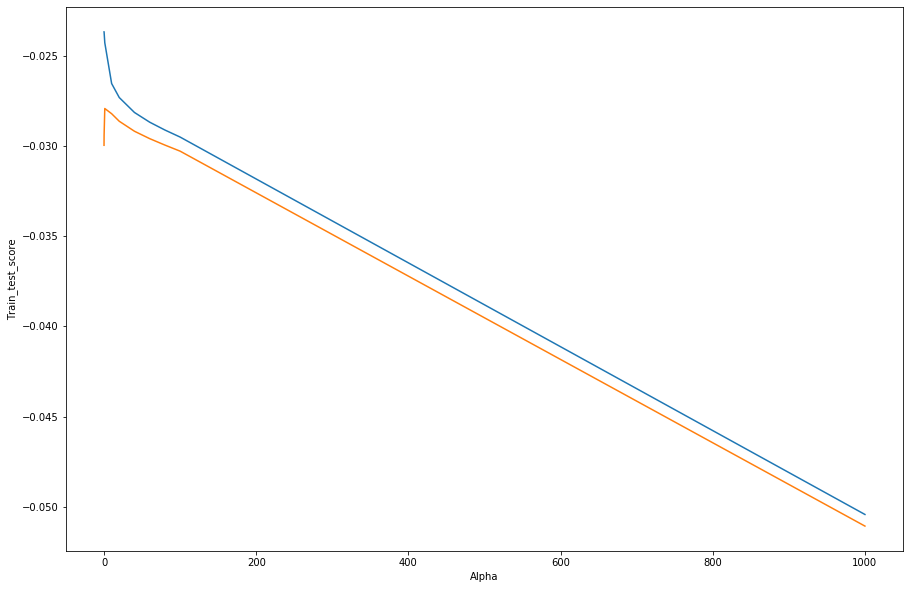

In [755]:
plt.figure(figsize=[15,10])
plt.plot(Results['param_alpha'],Results['mean_train_score'])
plt.plot(Results['param_alpha'],Results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Train_test_score')
plt.show()

In [756]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=1)

In [757]:
y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

In [758]:
print('Train_Metrics')
print('R2_train',r2_score(y_train,y_pred_train))
print('MSE_Train',mean_squared_error(y_train,y_pred_train))
print('------------------')
print('Test_Metrics')
print('R2_test',r2_score(y_test,y_pred_test))
print('MSE_Test',mean_squared_error(y_test,y_pred_test))


Train_Metrics
R2_train 0.8472514681165153
MSE_Train 0.024534008037805893
------------------
Test_Metrics
R2_test 0.8489916859975901
MSE_Test 0.022622060548291127


In [759]:
ridge_reg.coef_

array([ 0.14213742,  0.10107416,  0.16656889,  0.06638812, -0.11742633,
       -0.21126018,  0.27455591,  0.13442507,  0.28159245,  0.18598754,
        0.07268454,  0.10496258, -0.09917241, -0.51105855, -0.32838631,
        0.13115812, -0.18074202,  0.0929647 ,  0.11279721, -0.21221756,
        0.07529556, -0.13644802,  0.0415277 ])

In [760]:
Ridge_feat = pd.DataFrame({'Features': col,'Coeff': ridge_reg.coef_})
Ridge_feat


,Features,Coeff
0,OverallQual,0.142137
1,YearBuilt,0.101074
2,GrLivArea,0.166569
3,MSSubClass_70,0.066388
4,MSSubClass_90,-0.117426
5,MSSubClass_160,-0.211260
6,MSZoning_FV,0.274556
7,MSZoning_RH,0.134425
8,MSZoning_RL,0.281592
9,MSZoning_RM,0.185988


Text(0, 0.5, 'Predicted')

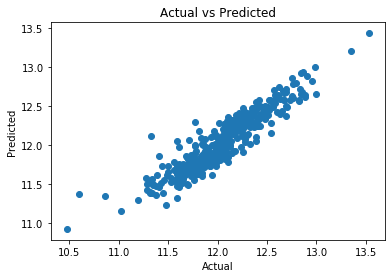

In [761]:
plt.scatter(y_test,y_pred_test)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 0, 'Residuals')

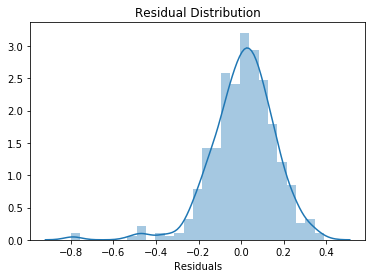

In [762]:
y_res = y_test - y_pred_test
sns.distplot(y_res,kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')

## LASSO

In [763]:

params = {'alpha':[0.001,0.1,1,10,20,40,60,80,100,1000]}
#params = {'alpha':[0.001, 0.01, 0.1,1.0,5,10,20,50]}


Lasso_reg = Lasso()

folds = 5
gridsearch_model = GridSearchCV(estimator = Lasso_reg,
                               param_grid = params,
                               scoring = 'neg_mean_squared_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)

gridsearch_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20, 40, 60, 80, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [764]:
gridsearch_model.best_params_

{'alpha': 0.001}

In [765]:
gridsearch_model.best_score_

-0.02883799055028318

In [766]:
Results_Lasso = pd.DataFrame(gridsearch_model.cv_results_)
Results_Lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003327,0.000412,0.002184,0.000406,0.001,{'alpha': 0.001},-0.035121,-0.026527,-0.027090,-0.027724,...,-0.028838,0.003173,1,-0.025328,-0.026182,-0.026087,-0.026125,-0.026208,-0.025986,0.000332
1,0.004150,0.000975,0.003096,0.001307,0.1,{'alpha': 0.1},-0.049619,-0.044761,-0.049421,-0.054595,...,-0.050191,0.003329,2,-0.047959,-0.049699,-0.050304,-0.050049,-0.048725,-0.049347,0.000877
2,0.004621,0.002574,0.000941,0.000968,1,{'alpha': 1},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
3,0.003344,0.006688,0.000000,0.000000,10,{'alpha': 10},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
4,0.000000,0.000000,0.000000,0.000000,20,{'alpha': 20},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
5,0.002464,0.002102,0.001035,0.000896,40,{'alpha': 40},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
6,0.001628,0.001387,0.000599,0.000799,60,{'alpha': 60},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
7,0.000000,0.000000,0.000000,0.000000,80,{'alpha': 80},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
8,0.003155,0.006310,0.000209,0.000418,100,{'alpha': 100},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
9,0.002910,0.005820,0.000413,0.000827,1000,{'alpha': 1000},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,3,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251


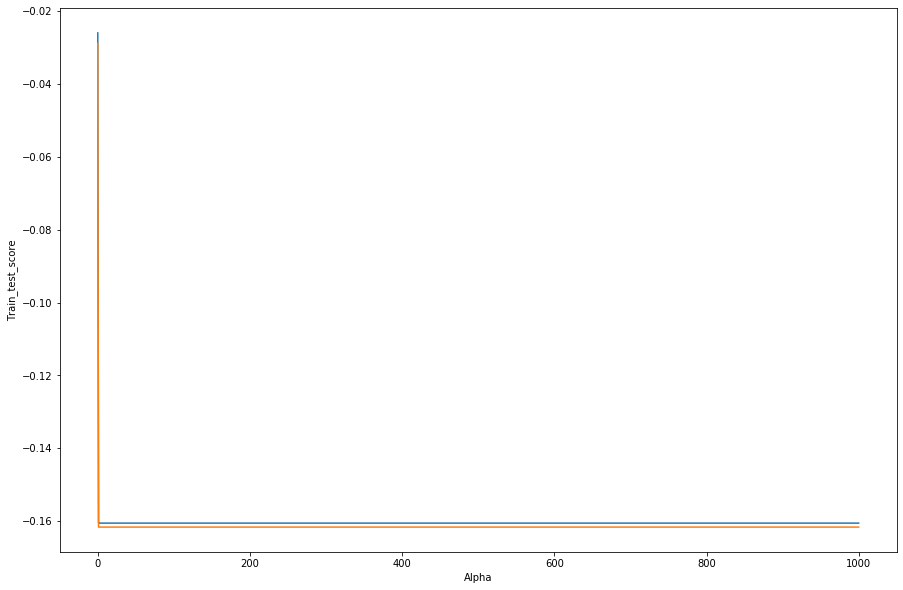

In [767]:
plt.figure(figsize=[15,10])
plt.plot(Results_Lasso['param_alpha'],Results_Lasso['mean_train_score'])
plt.plot(Results_Lasso['param_alpha'],Results_Lasso['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Train_test_score')
plt.show()

In [768]:
Lasso_reg = Lasso(alpha=0.001)
Lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.001)

In [769]:
y_pred_train = Lasso_reg.predict(X_train)
y_pred_test = Lasso_reg.predict(X_test)

In [770]:
print('Train_Metrics')
print('R2_train',r2_score(y_train,y_pred_train))
print('MSE_Train',mean_squared_error(y_train,y_pred_train))
print('------------------')
print('Test_Metrics')
print('R2_test',r2_score(y_test,y_pred_test))
print('MSE_Test',mean_squared_error(y_test,y_pred_test))

Train_Metrics
R2_train 0.8344800574072818
MSE_Train 0.026585313468574057
------------------
Test_Metrics
R2_test 0.8417744910927974
MSE_Test 0.02370324486058292


In [771]:
Lasso_reg.coef_

array([ 0.15259349,  0.09891636,  0.16336534,  0.05001226, -0.08506198,
       -0.17482823,  0.05749816, -0.        ,  0.09907142,  0.        ,
        0.04230004,  0.0738845 , -0.        , -0.2535932 , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.16209446,
        0.        , -0.        ,  0.03382628])

Text(0.5, 0, 'Residuals')

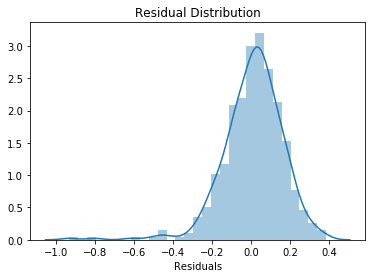

In [772]:
y_resi = y_test - y_pred_test
sns.distplot(y_resi,kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')


### Linear Regression
#### R2 scores

R2_train : 0.8495

R2_test: 0.8474

-------------------------------------------------------------------------------------------------------------------------------
#### MSE

MSE_train : 0.0241

MSE_test : 0.0229

-------------------------------------------------------------------------------------------------------------------------------


### Ridge

#### R2 scores


R2_train : 0.8473

R2_test : 0.8490


_______________________________________________________________________________________________________________________________

#### MSE

MSE_Train : 0.0245

MSE_Test : 0.0226

*******************************************************************************************************************************
Optimal value of alpha is 1 in Ridge regression

-------------------------------------------------------------------------------------------------------------------------------
### Lasso

#### R2 scores

R2_train : 0.8345

R2_test : 0.8418

-------------------------------------------------------------------------------------------------------------------------------
#### MSE

MSE_Train 0.0266

MSE_Test 0.0237

-------------------------------------------------------------------------------------------------------------------------------
Optimal value of alpha is 0.001 in Lasso regression

-------------------------------------------------------------------------------------------------------------------------------

##### The r2 scores and mse values are almost same for Linear Regression,Ridge and Lasso.

### Doubling of alpha value

#### Ridge Regression (alpha : 2)

In [773]:
ridge_reg = Ridge(alpha=2)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=2)

In [774]:
y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

print('Train_Metrics')
print('R2_train',r2_score(y_train,y_pred_train))
print('MSE_Train',mean_squared_error(y_train,y_pred_train))
print('------------------')
print('Test_Metrics')
print('R2_test',r2_score(y_test,y_pred_test))
print('MSE_Test',mean_squared_error(y_test,y_pred_test))




Train_Metrics
R2_train 0.8444119599332816
MSE_Train 0.02499008126961944
------------------
Test_Metrics
R2_test 0.8476507493640141
MSE_Test 0.022822941870068524


In [775]:
ridge_reg.coef_

array([ 0.14346409,  0.10127489,  0.1656628 ,  0.06877965, -0.11183395,
       -0.20310063,  0.20602426,  0.07229345,  0.2196543 ,  0.12318445,
        0.07009717,  0.10002254, -0.08968795, -0.381318  , -0.24216745,
        0.0952701 , -0.12076563,  0.08576276,  0.09330248, -0.18945197,
        0.0469205 , -0.09226884,  0.04007309])

#### Lasso Regression (alpha : 0.002)

In [776]:
Lasso_reg = Lasso(alpha=0.002)
Lasso_reg.fit(X_train,y_train)
y_pred_train = Lasso_reg.predict(X_train)
y_pred_test = Lasso_reg.predict(X_test)
print('Train_Metrics')
print('R2_train',r2_score(y_train,y_pred_train))
print('MSE_Train',mean_squared_error(y_train,y_pred_train))
print('------------------')
print('Test_Metrics')
print('R2_test',r2_score(y_test,y_pred_test))
print('MSE_Test',mean_squared_error(y_test,y_pred_test))


Train_Metrics
R2_train 0.8233598293448224
MSE_Train 0.028371410927597242
------------------
Test_Metrics
R2_test 0.836362690782573
MSE_Test 0.024513968926353265


In [777]:
Lasso_reg.coef_

array([ 0.16046124,  0.09849729,  0.16060204,  0.02515064, -0.04914493,
       -0.13921788,  0.00437478, -0.        ,  0.08934677, -0.        ,
        0.01009055,  0.04057025, -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.02798349])

In [778]:
X_train.columns

Index(['OverallQual', 'YearBuilt', 'GrLivArea', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'Neighborhood_NridgHt',
       'Condition1_RRAe', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'Electrical_FuseP',
       'SaleCondition_Partial'],
      dtype='object')

### Removal of 5 top most predictor variable and rebuilding of Lasso model

In [779]:
X_train = X_train.drop(['GrLivArea','OverallQual','MSSubClass_160','YearBuilt','MSZoning_RL'],axis=1)
X_test = X_test.drop(['GrLivArea','OverallQual','MSSubClass_160','YearBuilt','MSZoning_RL'],axis=1)

In [789]:
X_train.columns

Index(['MSSubClass_70', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RM', 'LandContour_HLS', 'Neighborhood_NridgHt',
       'Condition1_RRAe', 'Condition2_PosN', 'Exterior1st_BrkComm',
       'Foundation_Stone', 'Foundation_Wood', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_Wall', 'Electrical_FuseP',
       'SaleCondition_Partial'],
      dtype='object')

In [780]:

params = {'alpha':[0.001,0.1,1,10,20,40,60,80,100,1000]}
#params = {'alpha':[0.001, 0.01, 0.1,1.0,5,10,20,50]}


Lasso_reg = Lasso()

folds = 5
gridsearch_model = GridSearchCV(estimator = Lasso_reg,
                               param_grid = params,
                               scoring = 'neg_mean_squared_error',
                               cv = folds,
                               return_train_score = True,
                               verbose = 1)

gridsearch_model1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.1, 1, 10, 20, 40, 60, 80, 100,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [781]:
gridsearch_model1.best_params_


{'alpha': 0.001}

In [782]:
gridsearch_model1.best_score_


-0.11286053591014218

In [783]:
Results_Lasso = pd.DataFrame(gridsearch_model1.cv_results_)
Results_Lasso


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002973,0.000896,0.001498,0.000451,0.001,{'alpha': 0.001},-0.107672,-0.117925,-0.129742,-0.099891,...,-0.112861,0.010199,1,-0.109023,-0.107546,-0.104167,-0.111646,-0.108979,-0.108272,0.002442
1,0.003548,0.000681,0.001887,0.000877,0.1,{'alpha': 0.1},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
2,0.002518,0.000753,0.001372,0.000977,1,{'alpha': 1},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
3,0.003136,0.006271,0.000000,0.000000,10,{'alpha': 10},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
4,0.000000,0.000000,0.003125,0.006250,20,{'alpha': 20},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
5,0.003935,0.006047,0.000000,0.000000,40,{'alpha': 40},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
6,0.003136,0.006271,0.003121,0.006243,60,{'alpha': 60},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
7,0.003095,0.001013,0.001004,0.000015,80,{'alpha': 80},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
8,0.001609,0.000969,0.000601,0.000491,100,{'alpha': 100},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251
9,0.000000,0.000000,0.003347,0.006693,1000,{'alpha': 1000},-0.148921,-0.155600,-0.173001,-0.171260,...,-0.161600,0.009228,2,-0.163605,-0.162066,-0.157795,-0.158111,-0.160968,-0.160509,0.002251


Text(0, 0.5, 'Train_test_score')

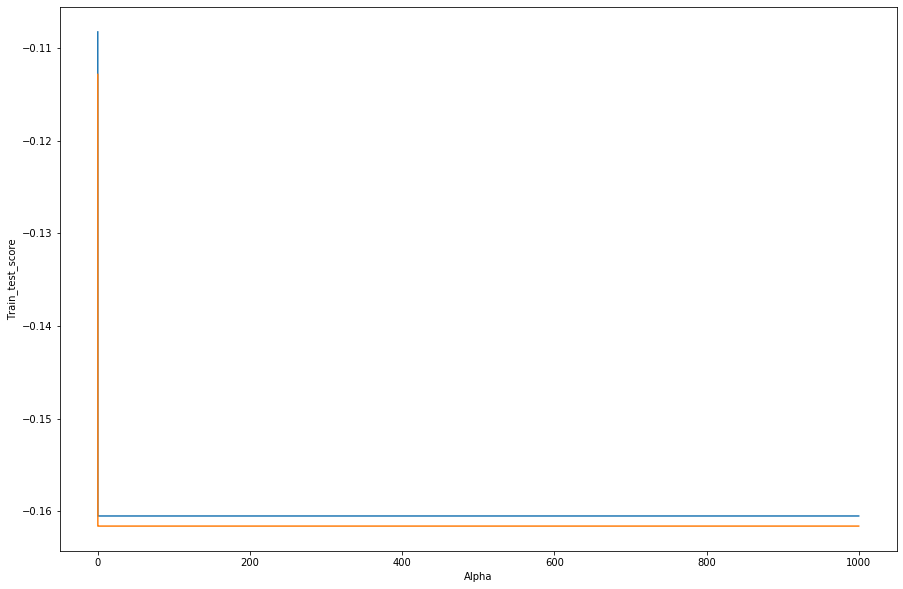

In [784]:
plt.figure(figsize=[15,10])
plt.plot(Results_Lasso['param_alpha'],Results_Lasso['mean_train_score'])
plt.plot(Results_Lasso['param_alpha'],Results_Lasso['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Train_test_score')


In [785]:
Lasso_reg = Lasso(alpha=0.001)
Lasso_reg.fit(X_train,y_train)




Lasso(alpha=0.001)

In [786]:
y_pred_train = Lasso_reg.predict(X_train)
y_pred_test = Lasso_reg.predict(X_test)

In [787]:
print('Train_Metrics')
print('R2_train',r2_score(y_train,y_pred_train))
print('MSE_Train',mean_squared_error(y_train,y_pred_train))
print('------------------')
print('Test_Metrics')
print('R2_test',r2_score(y_test,y_pred_test))
print('MSE_Test',mean_squared_error(y_test,y_pred_test))



Train_Metrics
R2_train 0.3224189547239541
MSE_Train 0.10883102185065789
------------------
Test_Metrics
R2_test 0.31132593836536115
MSE_Test 0.10316800384969371


In [788]:
Lasso_reg.coef_

array([ 0.06592692, -0.13985137,  0.05885676, -0.2071144 , -0.32406698,
        0.16826011,  0.46839863, -0.020529  , -0.        , -0.35721911,
       -0.        , -0.        ,  0.        ,  0.        , -0.57548855,
       -0.        , -0.        ,  0.2758154 ])